# CSC 575: SPECIAL TOPICS IN COMPUTER SCIENCE
# MATRIC NUMBER: 214853
# NAME: CHRISTIANA INIOLUWA ADISA

## Crop Suitability Prediction for Agricultural Fields Using Data Science

### Dataset Columns
#### N - ratio of Nitrogen content in soil - kg/ha
#### P - ratio of Phosphorous content in soil - kg/ha
#### K - ratio of Potassium content in soil - kg/ha
#### temperature - temperature in degree Celsius
#### humidity - relative humidity in %
#### ph - ph value of the soil
#### rainfall - rainfall in mm

## Importing libraries

In [336]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import itertools
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import pickle
# import xgboost as xgb
# from lightgbm import LGBMClassifier

## Loading Dataset

In [338]:
dataset = pd.read_csv("./Crop_recommendation.csv")

dataset.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [339]:
#Renaming columns
dataset.rename(columns={"N": "Nitrogen", "P": "Phosphorus", "K": "Potassium"}, inplace=True)
# print(dataset)

In [551]:
dataset.tail()

Nitrogen  Phosphorus  Potassium  temperature   humidity        ph  \
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label  label_code  
2195  177.774507  coffee           5  
2196  127.924610  coffee           5  
2197  173.322839  coffee           5  
2198  127.175293  coffee           5  
2199  140.937041  coffee           5

## Exploratory Data Analysis

In [342]:
#Summary of the dataset
dataset.describe()

Nitrogen   Phosphorus    Potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [343]:
dataset.size

17600

In [344]:
dataset.shape

(2200, 8)

In [345]:
dataset.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [346]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [347]:
dataset['label'].unique().size

22

In [348]:
# counts the number of unique elements in a dataset.
dataset.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [349]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [350]:
#Checking through the data types in thr dataset
dataset.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [351]:
#Checking for null values in the dataset
dataset.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

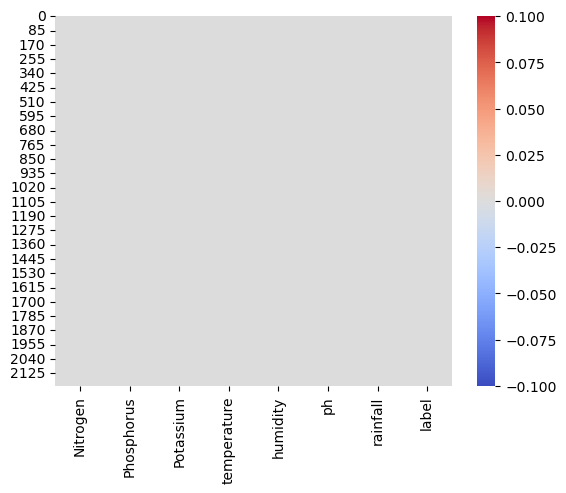

In [352]:
#heatmap showing visualizing the absence of null values
sns.heatmap(dataset.isnull(),cmap="coolwarm")
plt.show()

In [353]:
dataset.duplicated().sum()

0

### The cell above suggests there are no null values in the dataset

In [355]:
#Target variable value count
dataset.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

             Nitrogen  Phosphorus  Potassium  temperature  humidity        ph  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
Phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
Potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
ph           0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
Nitrogen     0.059020  
Phosphorus  -0.063839  
Potassium   -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


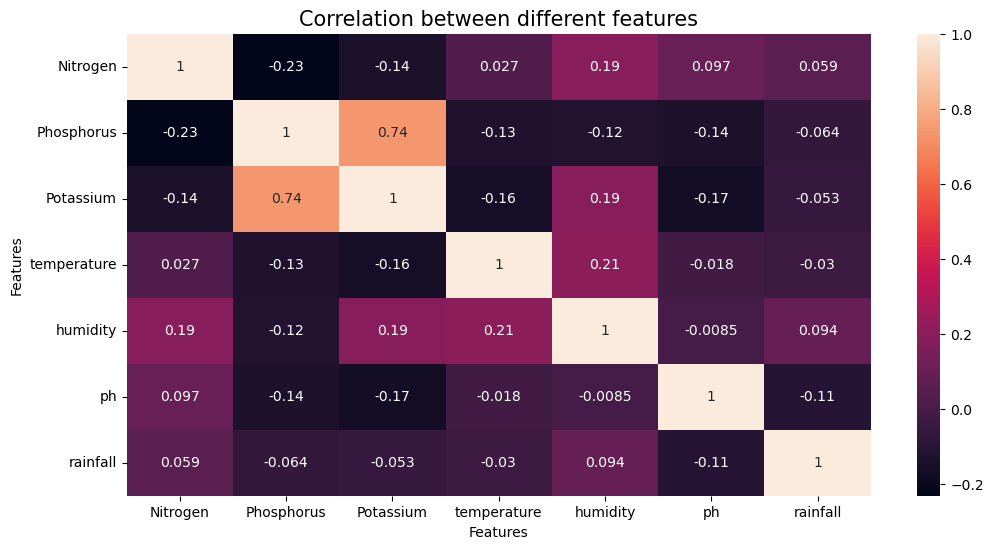

In [356]:
# Create a figure and a set of subplots with specified size
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Calculate the correlation matrix for the dataset, considering only numeric columns
corr_data = dataset.corr(numeric_only=True)

# Print the correlation matrix to the console for inspection
print(corr_data)

# Create a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation coefficients on the heatmap
# 'cbar=True' adds a colour bar to indicate the scale of correlation values
sns.heatmap(corr_data, annot=True, cbar=True)

# Set the label for the x-axis
plt.xlabel("Features")
# Set the label for the y-axis
plt.ylabel("Features")
# Set the title of the plot with specified font size and colour
plt.title('Correlation between different features', fontsize=15, c='black')

plt.show()

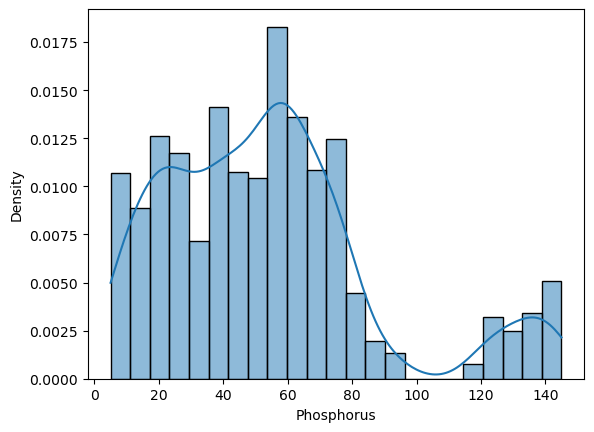

In [357]:
sns.histplot(dataset['Phosphorus'], stat="density", kde=True)
plt.show()

<Axes: xlabel='count', ylabel='label'>

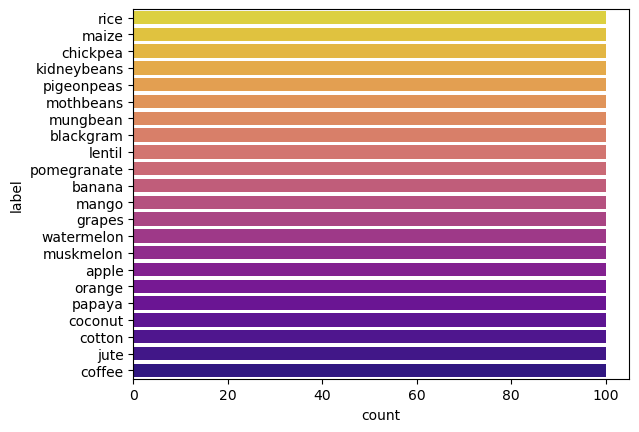

In [358]:
#check if the dataset is balanced or not
sns.countplot(y='label',data=dataset, palette="plasma_r")

In [359]:
crop_summary = pd.pivot_table(dataset,index=['label'],aggfunc='mean')
crop_summary

Nitrogen  Phosphorus  Potassium   humidity        ph    rainfall  \
label                                                                           
apple           20.80      134.22     199.89  92.333383  5.929663  112.654779   
banana         100.23       82.01      50.05  80.358123  5.983893  104.626980   
blackgram       40.02       67.47      19.24  65.118426  7.133952   67.884151   
chickpea        40.09       67.79      79.92  16.860439  7.336957   80.058977   
coconut         21.98       16.93      30.59  94.844272  5.976562  175.686646   
coffee         101.20       28.74      29.94  58.869846  6.790308  158.066295   
cotton         117.77       46.24      19.56  79.843474  6.912675   80.398043   
grapes          23.18      132.53     200.11  81.875228  6.025937   69.611829   
jute            78.40       46.86      39.99  79.639864  6.732778  174.792798   
kidneybeans     20.75       67.54      20.05  21.605357  5.749411  105.919778   
lentil          18.77       68.36      19.41  64.804785  6.927932   45.680454   
maize           77.76       48.44      19.79  65.092249  6.245190   84.766988   
mango           20.07       27.18      29.92  50.156573  5.766373   94.704515   
mothbeans       21.44       48.01      20.23  53.160418  6.831174   51.198487   
mungbean        20.99       47.28      19.87  85.499975  6.723957   48.403601   
muskmelon      100.32       17.72      50.08  92.342802  6.358805   24.689952   
orange          19.58       16.55      10.01  92.170209  7.016957  110.474969   
papaya          49.88       59.05      50.04  92.403388  6.741442  142.627839   
pigeonpeas      20.73       67.73      20.29  48.061633  5.794175  149.457564   
pomegranate     18.87       18.75      40.21  90.125504  6.429172  107.528442   
rice            79.89       47.58      39.87  82.272822  6.425471  236.181114   
watermelon      99.42       17.00      50.22  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

In [360]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new

label  Nitrogen  Phosphorus  Potassium   humidity        ph  \
0         apple     20.80      134.22     199.89  92.333383  5.929663   
1        banana    100.23       82.01      50.05  80.358123  5.983893   
2     blackgram     40.02       67.47      19.24  65.118426  7.133952   
3      chickpea     40.09       67.79      79.92  16.860439  7.336957   
4       coconut     21.98       16.93      30.59  94.844272  5.976562   
5        coffee    101.20       28.74      29.94  58.869846  6.790308   
6        cotton    117.77       46.24      19.56  79.843474  6.912675   
7        grapes     23.18      132.53     200.11  81.875228  6.025937   
8          jute     78.40       46.86      39.99  79.639864  6.732778   
9   kidneybeans     20.75       67.54      20.05  21.605357  5.749411   
10       lentil     18.77       68.36      19.41  64.804785  6.927932   
11        maize     77.76       48.44      19.79  65.092249  6.245190   
12        mango     20.07       27.18      29.92  50.156573  5.766373   
13    mothbeans     21.44       48.01      20.23  53.160418  6.831174   
14     mungbean     20.99       47.28      19.87  85.499975  6.723957   
15    muskmelon    100.32       17.72      50.08  92.342802  6.358805   
16       orange     19.58       16.55      10.01  92.170209  7.016957   
17       papaya     49.88       59.05      50.04  92.403388  6.741442   
18   pigeonpeas     20.73       67.73      20.29  48.061633  5.794175   
19  pomegranate     18.87       18.75      40.21  90.125504  6.429172   
20         rice     79.89       47.58      39.87  82.272822  6.425471   
21   watermelon     99.42       17.00      50.22  85.160375  6.495778   

      rainfall  temperature  
0   112.654779    22.630942  
1   104.626980    27.376798  
2    67.884151    29.973340  
3    80.058977    18.872847  
4   175.686646    27.409892  
5   158.066295    25.540477  
6    80.398043    23.988958  
7    69.611829    23.849575  
8   174.792798    24.958376  
9   105.919778    20.115085  
10   45.680454    24.509052  
11   84.766988    22.389204  
12   94.704515    31.208770  
13   51.198487    28.194920  
14   48.403601    28.525775  
15   24.689952    28.663066  
16  110.474969    22.765725  
17  142.627839    33.723859  
18  149.457564    27.741762  
19  107.528442    21.837842  
20  236.181114    23.689332  
21   50.786219    25.591767

C:\Users\Christiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Christiana\AppData\Local\Temp\ipykernel_24736\1496371457.py:2: UserWarning:

The figure layout has changed to tight



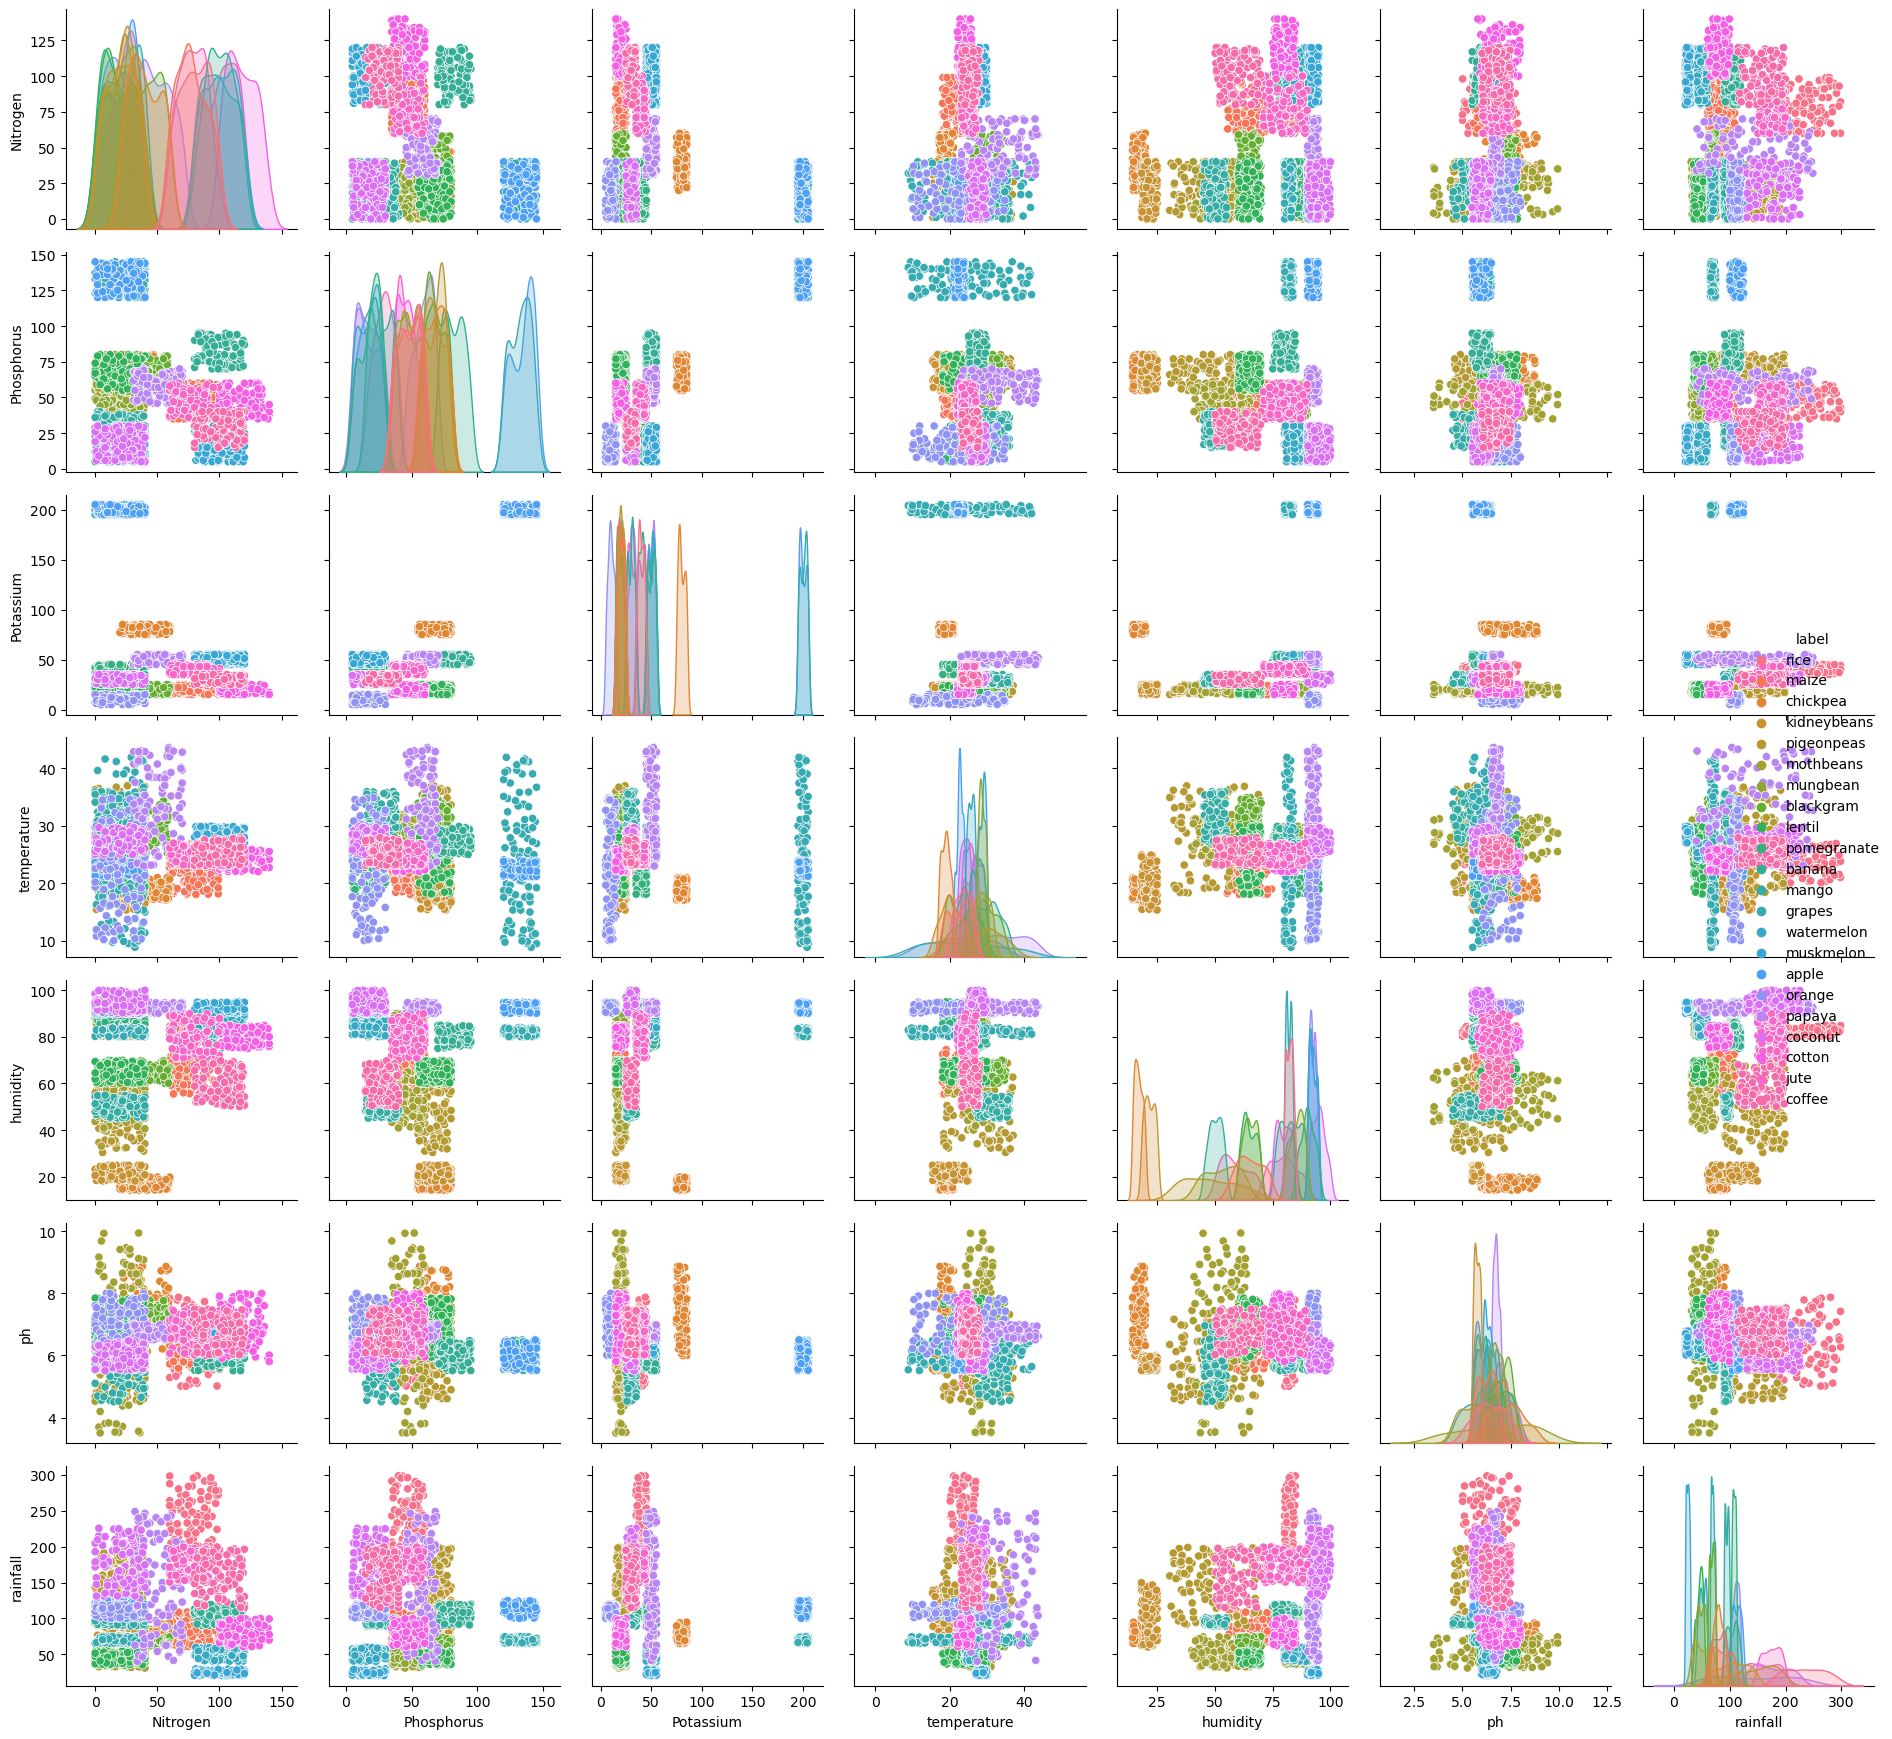

In [361]:

sns.pairplot(dataset, hue = 'label')
plt.tight_layout()
plt.show()

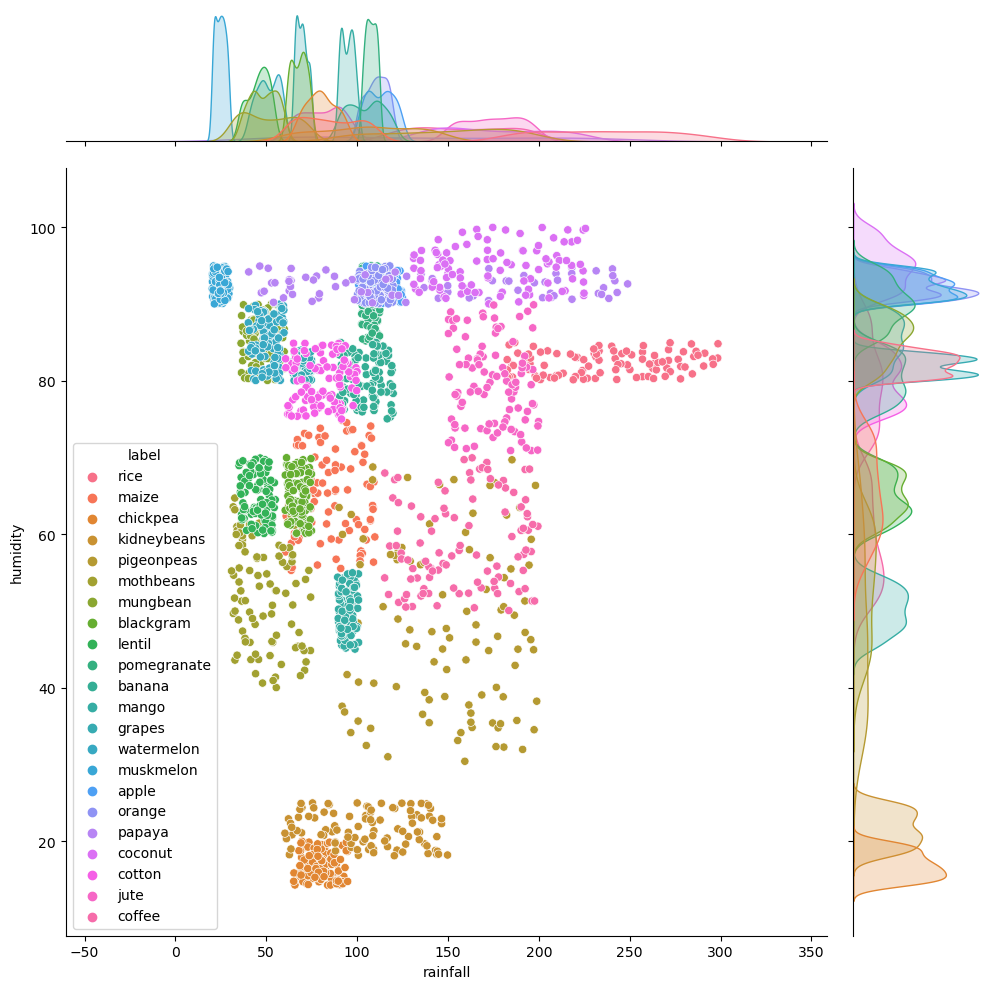

In [362]:
# Create a joint plot to visualize the relationship between rainfall and humidity
# Filter the dataset to include only rows where temperature is less than 40 and rainfall is greater than 40
sns.jointplot(x="rainfall",y="humidity",data=dataset[(dataset['temperature']<40) & (dataset['rainfall']>20)],
              height=10,
              hue="label") # Color the points based on the 'label' column

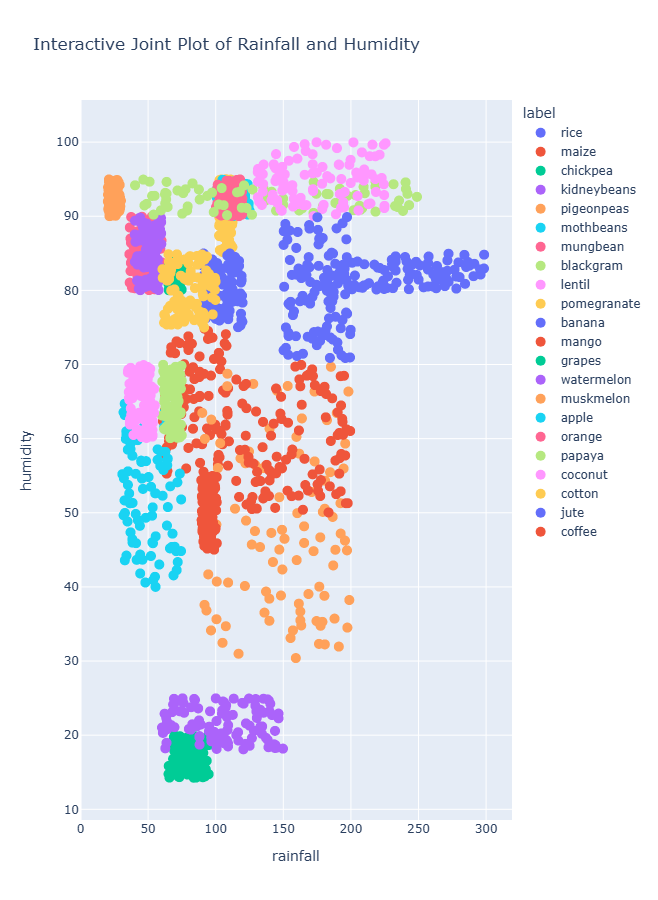

In [363]:
# Filter the dataset
filtered_data = dataset[(dataset['temperature'] < 40) & (dataset['rainfall'] > 20)]

# Create an interactive scatter plot with marginal histograms
fig = px.scatter(
    filtered_data,
    x="rainfall",
    y="humidity",
    color="label",  # Color the points based on the 'label' column
    title="Interactive Joint Plot of Rainfall and Humidity",
    height=900
)

# Add marginal histograms
fig.update_traces(marker=dict(size=10))  # Adjust marker size if needed
fig.show()

In [364]:
dataset.describe()

Nitrogen   Phosphorus    Potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

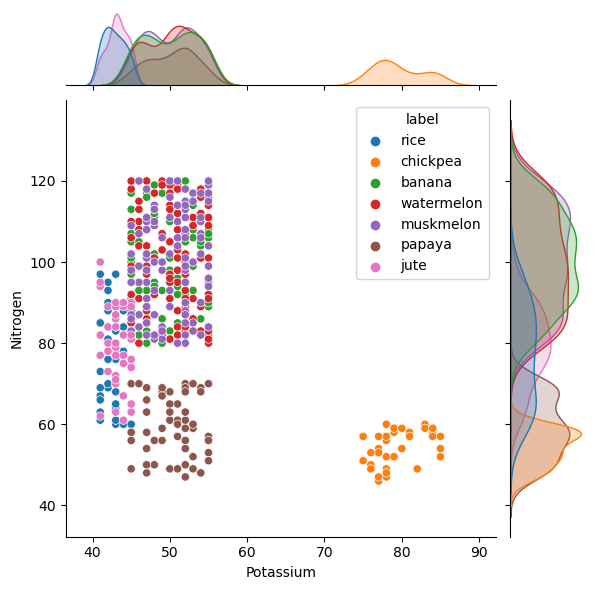

In [365]:
# Create a joint plot to visualize the relationship between Potassium and Nitrogen
# Filter the dataset to include only rows where Nitrogen is greater than 45
# and Potassium is greater than 40
# the 'label' column to colour the points in the plot
sns.jointplot(x="Potassium",y="Nitrogen",data=dataset[(dataset['Nitrogen']>45)&
              (dataset['Potassium']>40)],hue="label")

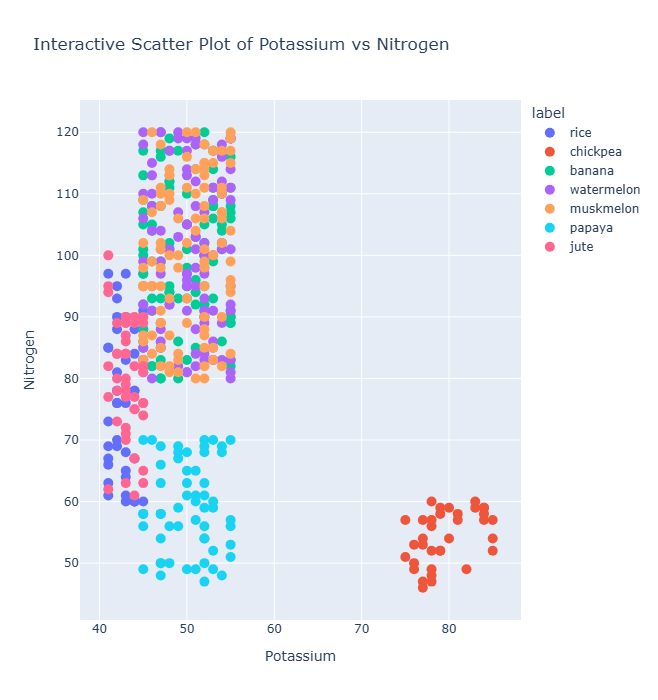

In [366]:
import plotly.express as px

# Filter the dataset to include only rows where Nitrogen is greater than 45
# and Potassium is greater than 40
filtered_data = dataset[(dataset['Nitrogen'] > 45) & (dataset['Potassium'] > 40)]

# Create an interactive scatter plot with Plotly
fig = px.scatter(filtered_data, 
                 x="Potassium", 
                 y="Nitrogen", 
                 color="label", 
                 title="Interactive Scatter Plot of Potassium vs Nitrogen",
                height=700)

# Show the plot
fig.update_traces(marker=dict(size=10))  
fig.show()

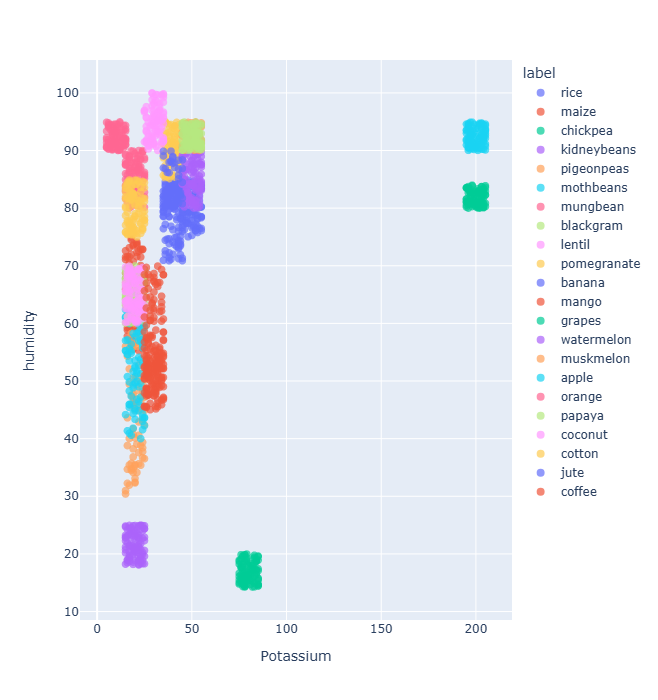

In [367]:
fig = px.scatter(dataset, x="Potassium", y="humidity", color='label', 
                 height = 700,
                 opacity=0.7)

# Show the interactive plot
fig.update_traces(marker=dict(size=8)) 
fig.show()

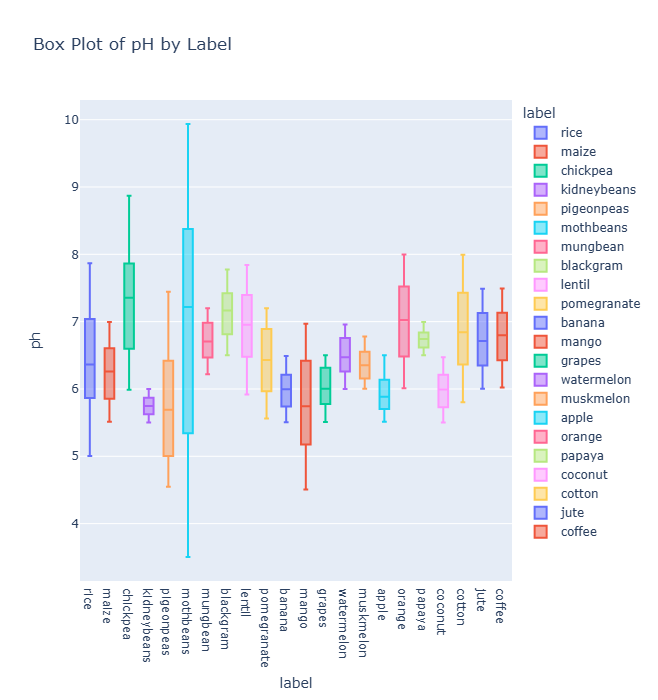

In [368]:
# ph values are critical when it comes to soil. Stability between 6 and 7 is preferred
fig = px.box(dataset, x='label', y='ph', title='Box Plot of pH by Label', 
             color="label", height= 700,
            width=1000)

# Show the interactive plot
fig.show()

In [369]:
#More visualization
# New data frame named df_column by selecting specific columns.
df_column = dataset[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
df_column

Nitrogen  Phosphorus  Potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall  
0     202.935536  
1     226.655537  
2     263.964248  
3     242.864034  
4     262.717340  
...          ...  
2195  177.774507  
2196  127.924610  
2197  173.322839  
2198  127.175293  
2199  140.937041  

[2200 rows x 7 columns]

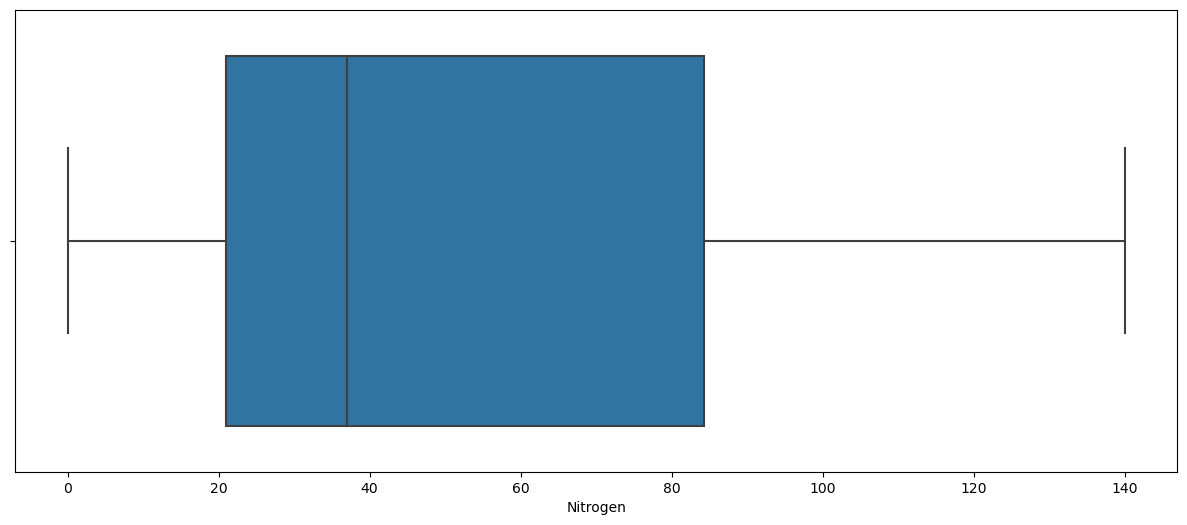

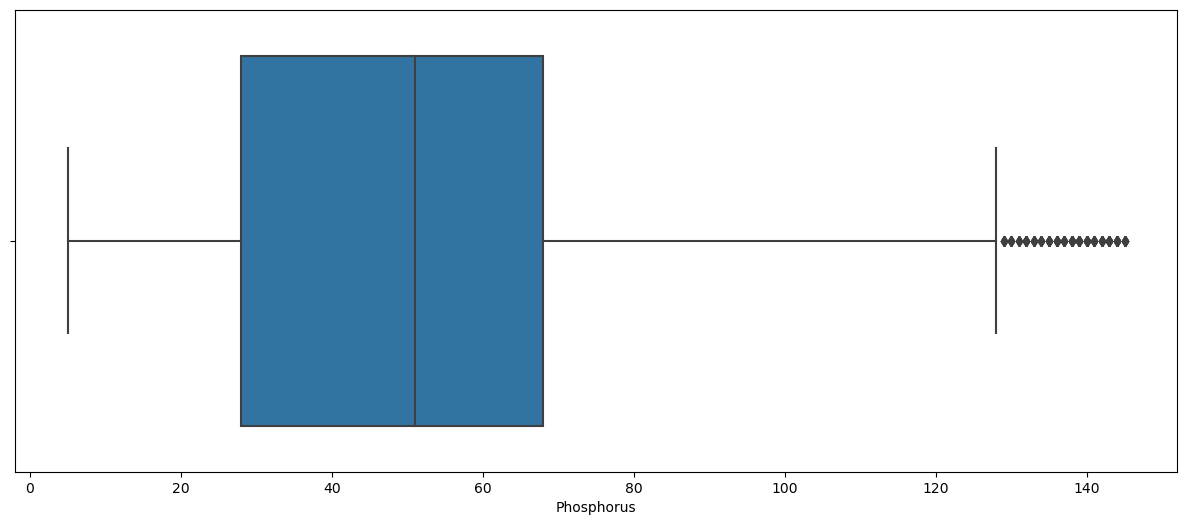

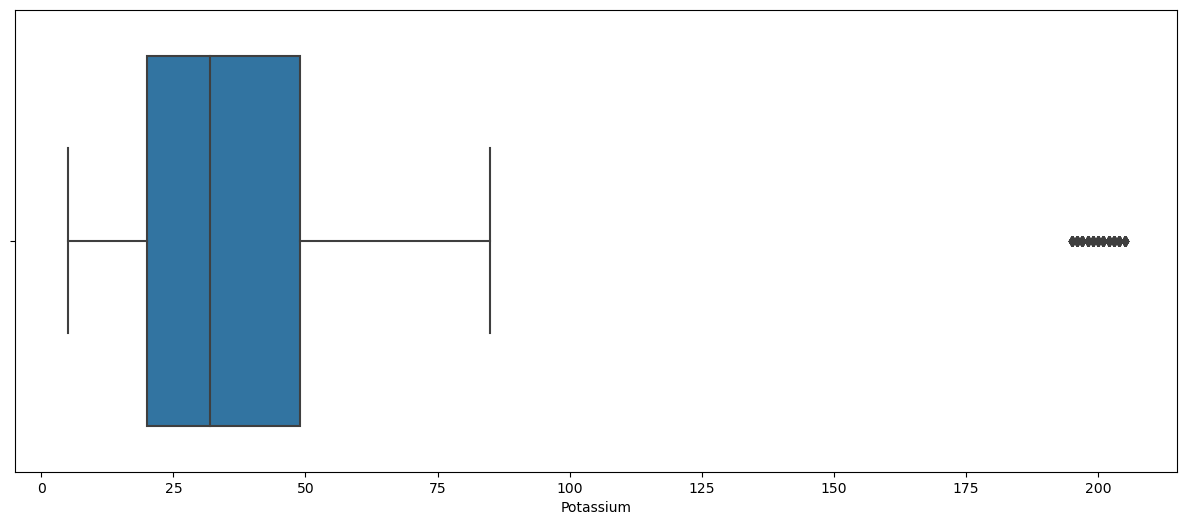

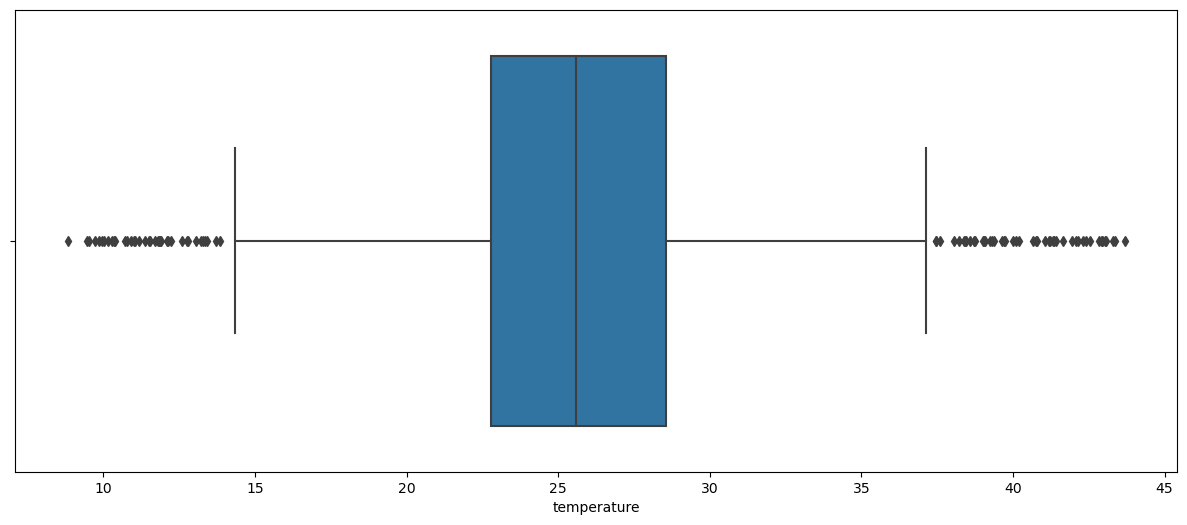

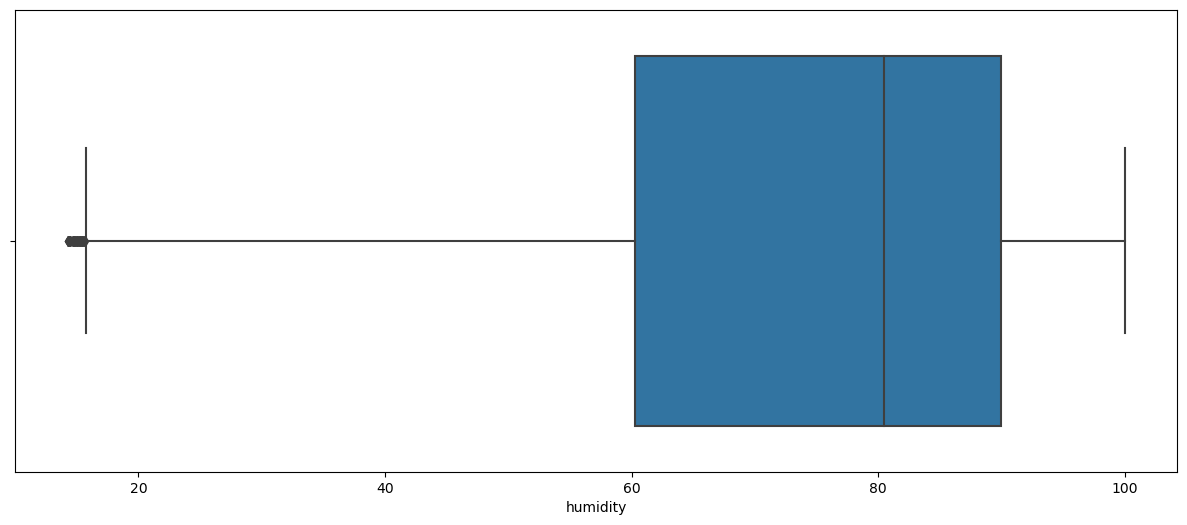

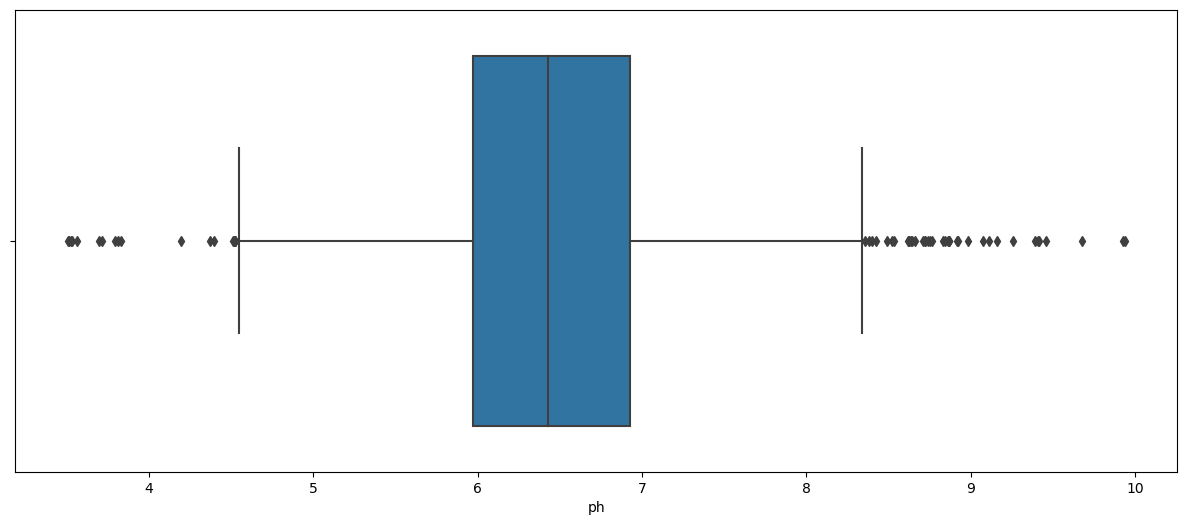

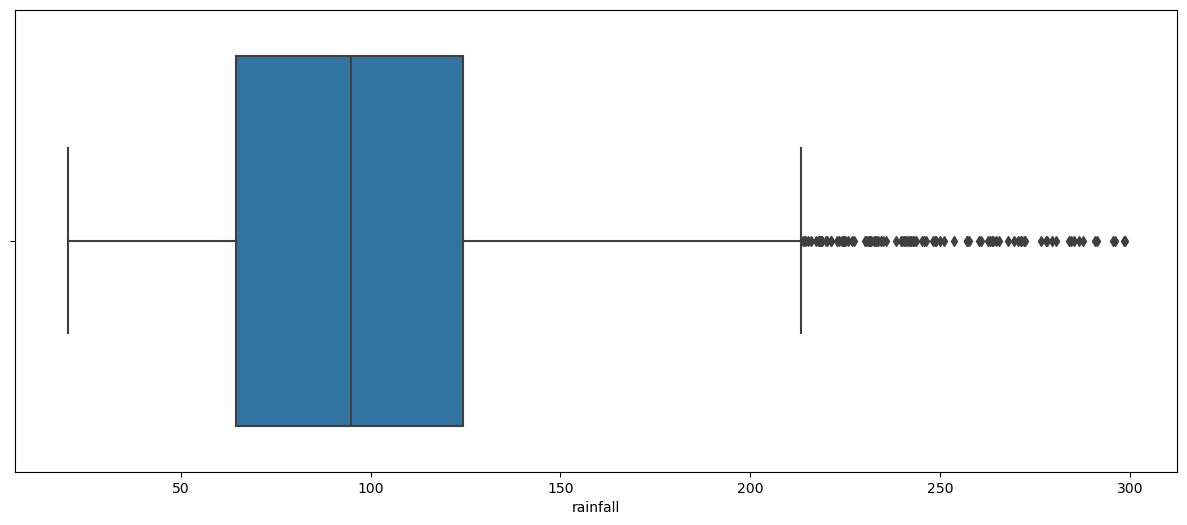

In [370]:
# Iterate over each column in the DataFrame
for i in df_column.columns:

    # Create a new figure with a specified size for the boxplot
    plt.figure(figsize = (15,6))
    
    # Create a boxplot for the current column
    sns.boxplot(x = df_column[i])
    
    # Display the boxplot
    plt.show()

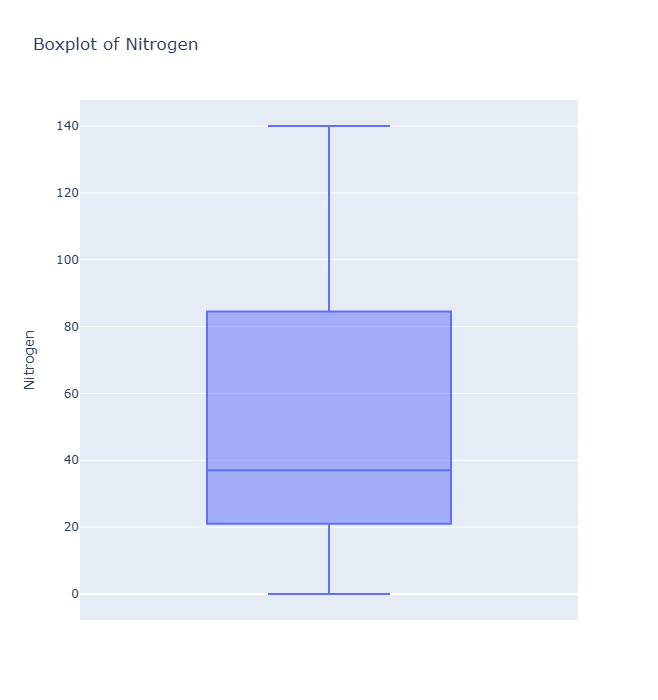

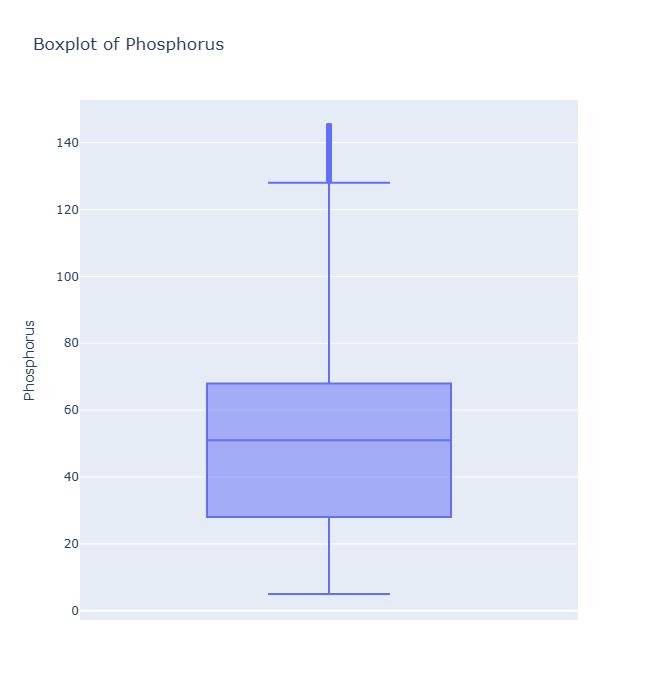

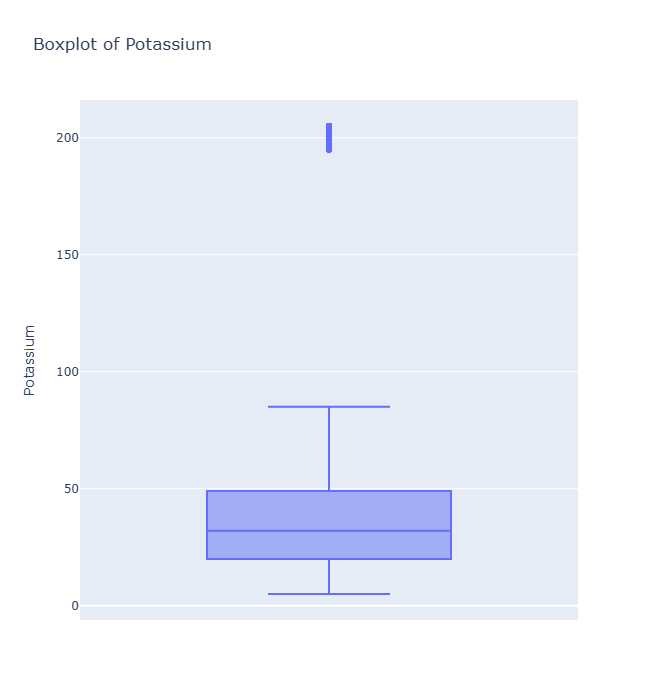

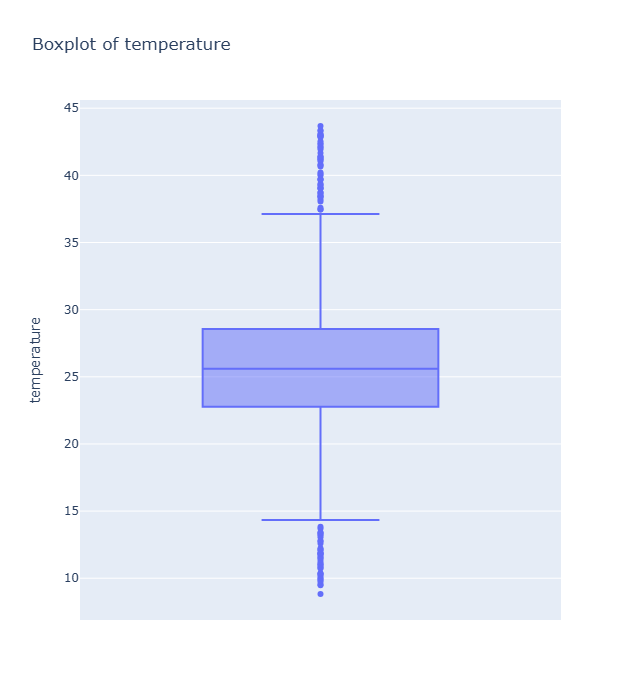

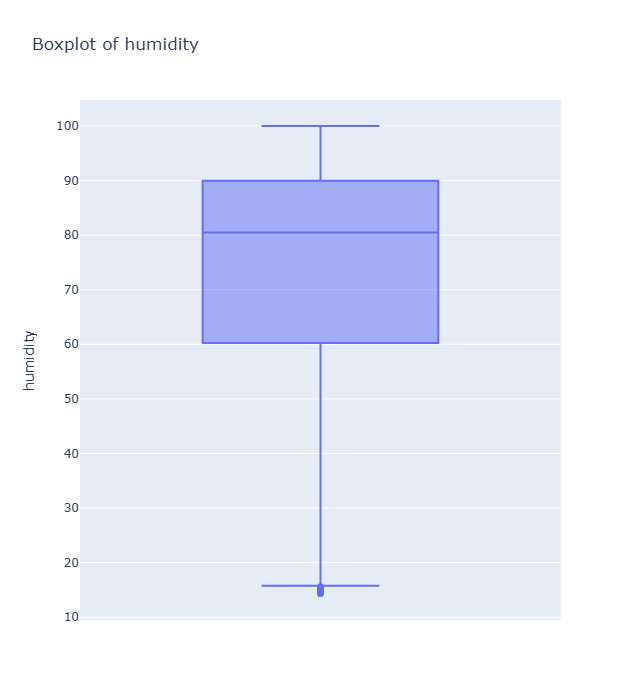

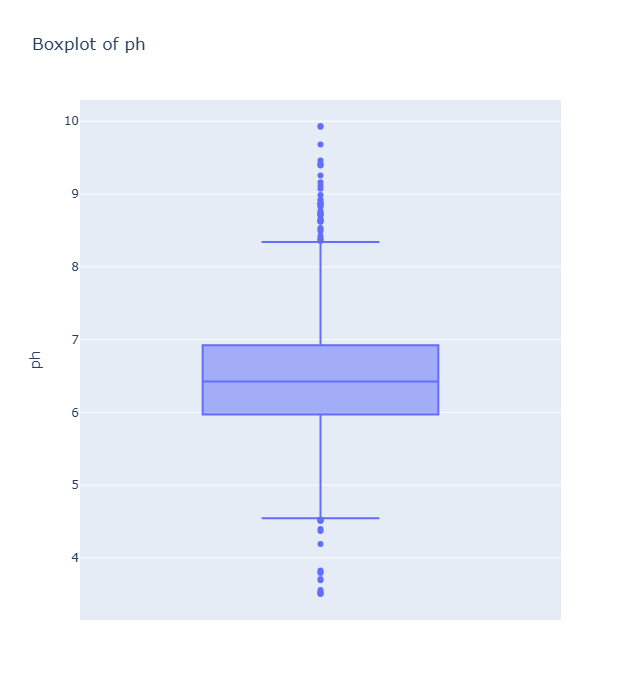

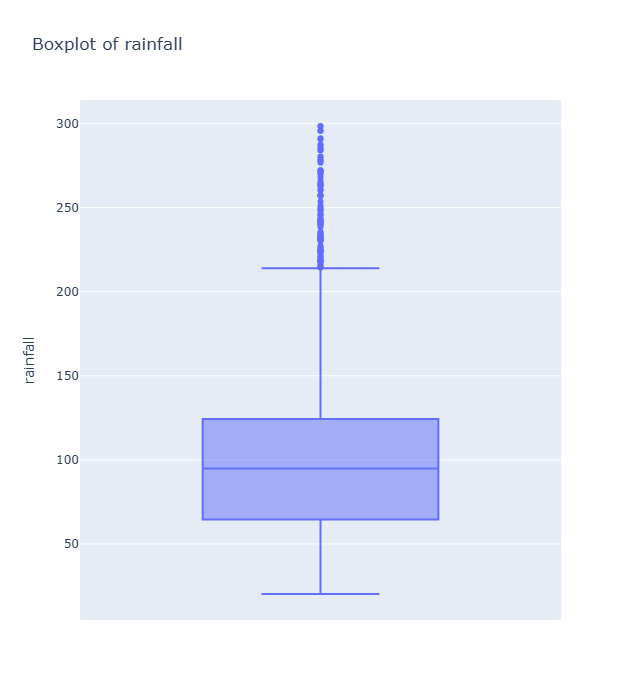

In [371]:
# Iterate over each column in the DataFrame
for i in df_column.columns:

    # Create an interactive boxplot for the current column
    fig = px.box(df_column, y=i, title=f'Boxplot of {i}', height=700)
    
    # Show the interactive boxplot
    fig.show()

In [372]:
crop_summary_new

label  Nitrogen  Phosphorus  Potassium   humidity        ph  \
0         apple     20.80      134.22     199.89  92.333383  5.929663   
1        banana    100.23       82.01      50.05  80.358123  5.983893   
2     blackgram     40.02       67.47      19.24  65.118426  7.133952   
3      chickpea     40.09       67.79      79.92  16.860439  7.336957   
4       coconut     21.98       16.93      30.59  94.844272  5.976562   
5        coffee    101.20       28.74      29.94  58.869846  6.790308   
6        cotton    117.77       46.24      19.56  79.843474  6.912675   
7        grapes     23.18      132.53     200.11  81.875228  6.025937   
8          jute     78.40       46.86      39.99  79.639864  6.732778   
9   kidneybeans     20.75       67.54      20.05  21.605357  5.749411   
10       lentil     18.77       68.36      19.41  64.804785  6.927932   
11        maize     77.76       48.44      19.79  65.092249  6.245190   
12        mango     20.07       27.18      29.92  50.156573  5.766373   
13    mothbeans     21.44       48.01      20.23  53.160418  6.831174   
14     mungbean     20.99       47.28      19.87  85.499975  6.723957   
15    muskmelon    100.32       17.72      50.08  92.342802  6.358805   
16       orange     19.58       16.55      10.01  92.170209  7.016957   
17       papaya     49.88       59.05      50.04  92.403388  6.741442   
18   pigeonpeas     20.73       67.73      20.29  48.061633  5.794175   
19  pomegranate     18.87       18.75      40.21  90.125504  6.429172   
20         rice     79.89       47.58      39.87  82.272822  6.425471   
21   watermelon     99.42       17.00      50.22  85.160375  6.495778   

      rainfall  temperature  
0   112.654779    22.630942  
1   104.626980    27.376798  
2    67.884151    29.973340  
3    80.058977    18.872847  
4   175.686646    27.409892  
5   158.066295    25.540477  
6    80.398043    23.988958  
7    69.611829    23.849575  
8   174.792798    24.958376  
9   105.919778    20.115085  
10   45.680454    24.509052  
11   84.766988    22.389204  
12   94.704515    31.208770  
13   51.198487    28.194920  
14   48.403601    28.525775  
15   24.689952    28.663066  
16  110.474969    22.765725  
17  142.627839    33.723859  
18  149.457564    27.741762  
19  107.528442    21.837842  
20  236.181114    23.689332  
21   50.786219    25.591767

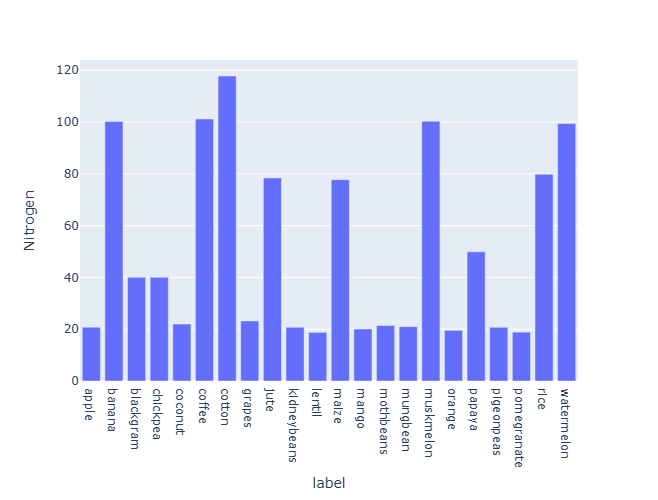

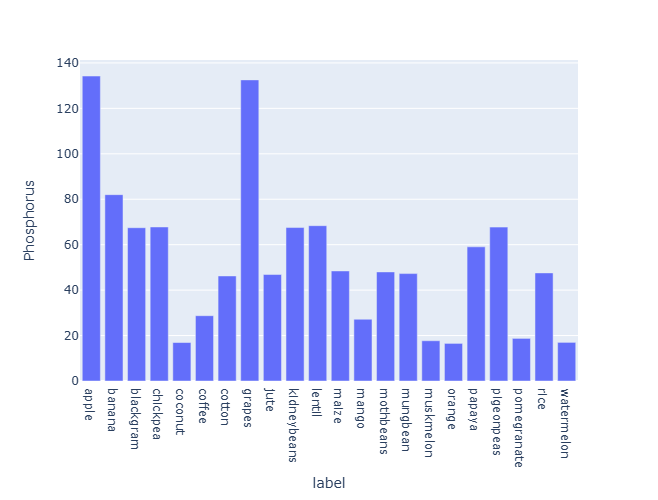

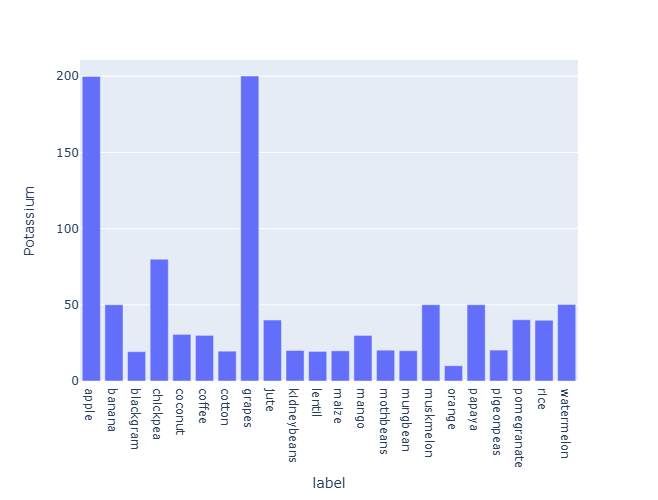

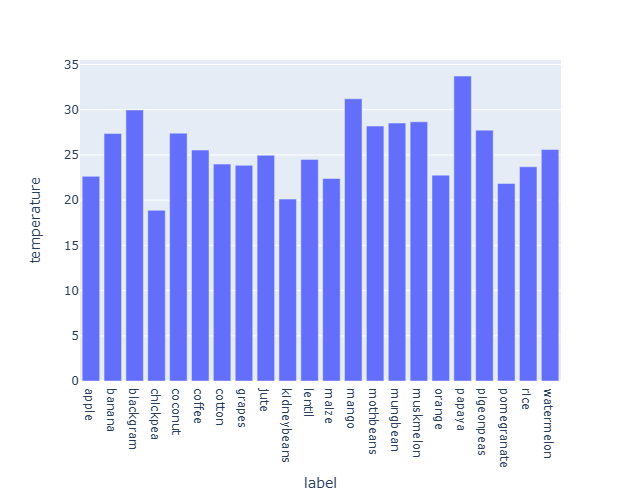

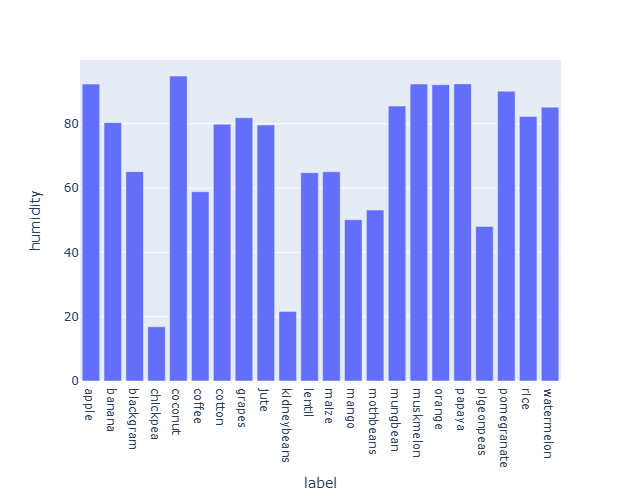

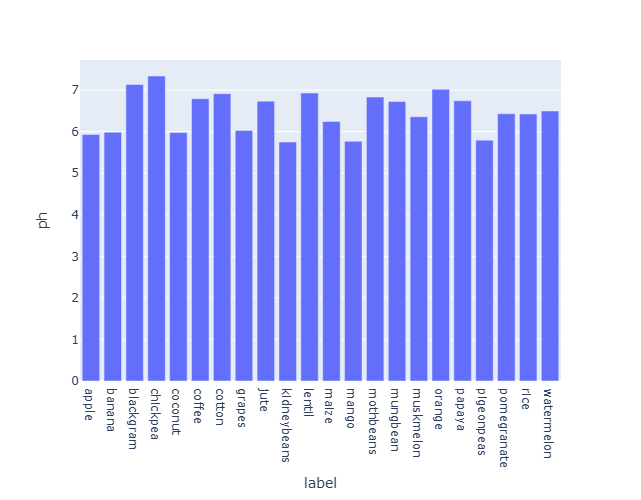

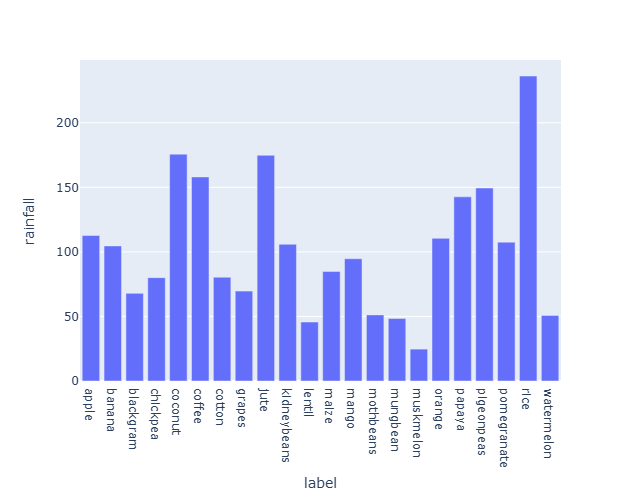

In [373]:
for i in df_column.columns:
    
    # Create an interactive barplot for the current column
    fig = px.bar(x = "label", y = i, data_frame = crop_summary_new, height = 500)
    
    # displays the bar plot for the current column i. 
    # After displaying each bar plot, the loop continues to the next column until all columns in df_column have been plotted
    fig.show()

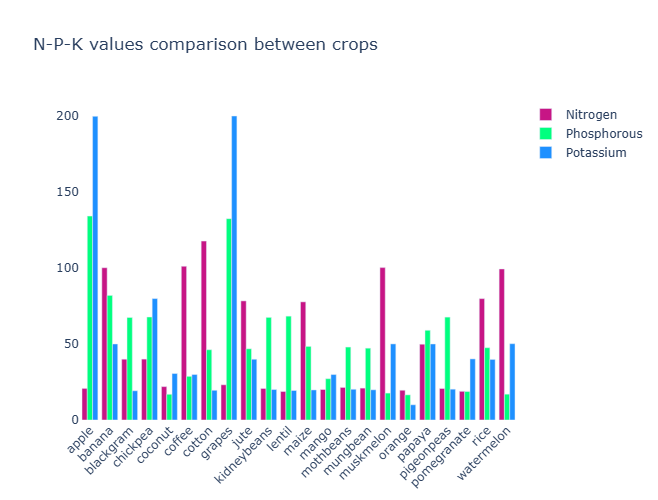

In [374]:
# Create a figure object
fig = go.Figure()

# Add a bar trace for Nitrogen values
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names/categories on the x-axis
    y=crop_summary['Nitrogen'],  # Nitrogen values on the y-axis
    name='Nitrogen',  # Legend name
    marker_color='mediumvioletred'  # Bar color
))

# Add a bar trace for Phosphorous values
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names/categories on the x-axis
    y=crop_summary['Phosphorus'],  # Phosphorous values on the y-axis
    name='Phosphorous',  # Legend name
    marker_color='springgreen'  # Bar color
))

# Add a bar trace for Potash values
fig.add_trace(go.Bar(
    x=crop_summary.index,  # Crop names/categories on the x-axis
    y=crop_summary['Potassium'],  # Potassium values on the y-axis
    name='Potassium',  # Legend name
    marker_color='dodgerblue'  # Bar color
))

# Update the layout with title, background colour, bar mode, and x-axis rotation
fig.update_layout(
    title="N-P-K values comparison between crops",  # Title of the chart
    plot_bgcolor='white',  # Set background colour to white
    barmode='group',  # Grouped bar chart
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    height= 500,
    width= 1100
)

# Display the figure
fig.show()


In [375]:
crop_summary

Nitrogen  Phosphorus  Potassium   humidity        ph    rainfall  \
label                                                                           
apple           20.80      134.22     199.89  92.333383  5.929663  112.654779   
banana         100.23       82.01      50.05  80.358123  5.983893  104.626980   
blackgram       40.02       67.47      19.24  65.118426  7.133952   67.884151   
chickpea        40.09       67.79      79.92  16.860439  7.336957   80.058977   
coconut         21.98       16.93      30.59  94.844272  5.976562  175.686646   
coffee         101.20       28.74      29.94  58.869846  6.790308  158.066295   
cotton         117.77       46.24      19.56  79.843474  6.912675   80.398043   
grapes          23.18      132.53     200.11  81.875228  6.025937   69.611829   
jute            78.40       46.86      39.99  79.639864  6.732778  174.792798   
kidneybeans     20.75       67.54      20.05  21.605357  5.749411  105.919778   
lentil          18.77       68.36      19.41  64.804785  6.927932   45.680454   
maize           77.76       48.44      19.79  65.092249  6.245190   84.766988   
mango           20.07       27.18      29.92  50.156573  5.766373   94.704515   
mothbeans       21.44       48.01      20.23  53.160418  6.831174   51.198487   
mungbean        20.99       47.28      19.87  85.499975  6.723957   48.403601   
muskmelon      100.32       17.72      50.08  92.342802  6.358805   24.689952   
orange          19.58       16.55      10.01  92.170209  7.016957  110.474969   
papaya          49.88       59.05      50.04  92.403388  6.741442  142.627839   
pigeonpeas      20.73       67.73      20.29  48.061633  5.794175  149.457564   
pomegranate     18.87       18.75      40.21  90.125504  6.429172  107.528442   
rice            79.89       47.58      39.87  82.272822  6.425471  236.181114   
watermelon      99.42       17.00      50.22  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

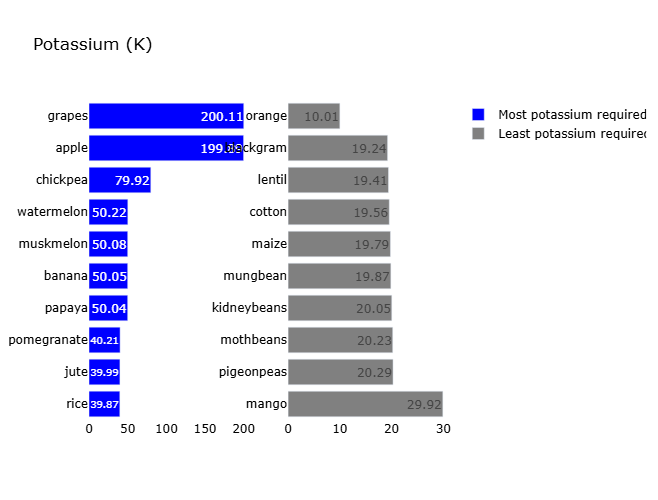

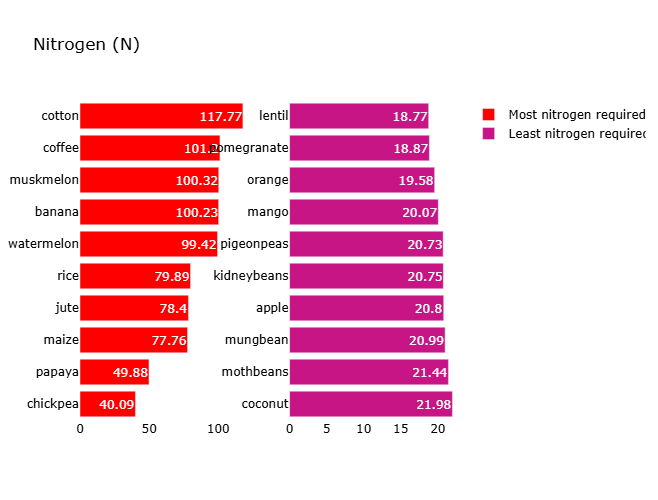

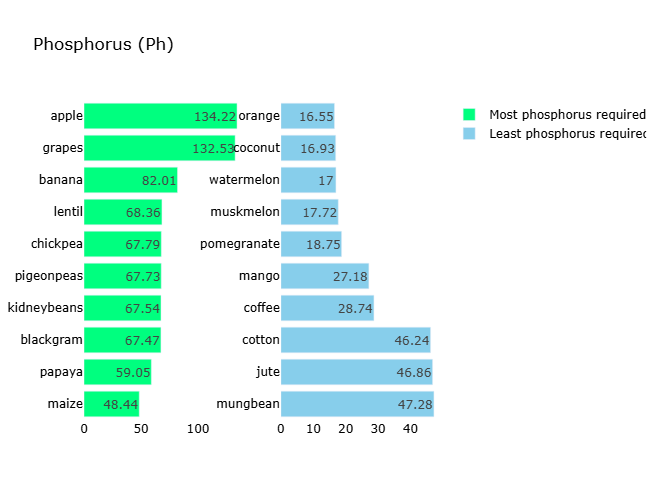

In [376]:
#Potassium
# Sort the DataFrame by Potassium in descending order
crop_summary_N = crop_summary.sort_values(by='Potassium', ascending=False)

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Extract the top 10 crops with the highest potassium requirement
top = {
    'y': crop_summary_N['Potassium'][0:10].sort_values().index,  # Crop names (sorted for better visualization)
    'x': crop_summary_N['Potassium'][0:10].sort_values()  # Corresponding potassium values
}

# Extract the bottom 10 crops with the lowest potassium requirement
last = {
    'y': crop_summary_N['Potassium'][-10:].index,  # Crop names
    'x': crop_summary_N['Potassium'][-10:]  # Corresponding potassium values
}

# Add a horizontal bar chart for the top 10 crops
fig.add_trace(
    go.Bar(top,  
           name="Most potassium required",  # Legend label
           marker_color="blue",  # Bar colour
           orientation='h',  # Horizontal bar chart
           text=top['x']),  # Display potassium values as text on bars
    row=1, col=1  # Position the chart in the first column
)

# Add a horizontal bar chart for the bottom 10 crops
fig.add_trace(
    go.Bar(last,
           name="Least potassium required",  # Legend label
           marker_color="grey",  # Bar color
           orientation='h',  # Horizontal bar chart
           text=last['x']),  # Display potassium values as text on bars
    row=1, col=2  # Position the chart in the second column
)

# Customize the text display on bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Update the layout of the figure
fig.update_layout(title_text="Potassium (K)",  # Chart title
                  plot_bgcolor='white',  # White background
                  font_size=12,  # Font size for labels
                  font_color='black',  # Font colour for labels
                  height=500,
                 width= 1000)  # Set figure height

# Remove grid lines for a cleaner look
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# Display the figure
fig.show()

#Nitrogen
# Sort the DataFrame by Nitrogen in descending order
crop_summary_N = crop_summary.sort_values(by='Nitrogen', ascending=False)

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Extract the top 10 crops with the highest Nitrogen requirement
top = {
    'y': crop_summary_N['Nitrogen'][0:10].sort_values().index,  # Crop names (sorted for better visualization)
    'x': crop_summary_N['Nitrogen'][0:10].sort_values()  # Corresponding Nitrogen values
}

# Extract the bottom 10 crops with the lowest Nitrogen requirement
last = {
    'y': crop_summary_N['Nitrogen'][-10:].index,  # Crop names
    'x': crop_summary_N['Nitrogen'][-10:]  # Corresponding Nitrogen values
}

# Add a horizontal bar chart for the top 10 crops
fig.add_trace(
    go.Bar(top,  
           name="Most nitrogen required",  # Legend label
           marker_color="red",  # Bar colour
           orientation='h',  # Horizontal bar chart
           text=top['x']),  # Display nitrogen values as text on bars
    row=1, col=1  # Position the chart in the first column
)

# Add a horizontal bar chart for the bottom 10 crops
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",  # Legend label
           marker_color="mediumvioletred",  # Bar color
           orientation='h',  # Horizontal bar chart
           text=last['x']),  # Display nitrogen values as text on bars
    row=1, col=2  # Position the chart in the second column
)

# Customize the text display on bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Update the layout of the figure
fig.update_layout(title_text="Nitrogen (N)",  # Chart title
                  plot_bgcolor='white',  # White background
                  font_size=12,  # Font size for labels
                  font_color='black',  # Font colour for labels
                  height=500)  # Set figure height

# Remove grid lines for a cleaner look
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

# Display the figure
fig.show()

#Phosphorus
# Sort the DataFrame by Phosphorus in descending order
crop_summary_N = crop_summary.sort_values(by='Phosphorus', ascending=False)

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Extract the top 10 crops with the highest phosphorus requirement
top = {
    'y': crop_summary_N['Phosphorus'][0:10].sort_values().index,  # Crop names (sorted for better visualization)
    'x': crop_summary_N['Phosphorus'][0:10].sort_values()  # Corresponding phosphorus values
}

# Extract the bottom 10 crops with the lowest phosphorus requirement
last = {
    'y': crop_summary_N['Phosphorus'][-10:].index,  # Crop names
    'x': crop_summary_N['Phosphorus'][-10:]  # Corresponding phosphorus values
}

# Add a horizontal bar chart for the top 10 crops
fig.add_trace(
    go.Bar(top,  
           name="Most phosphorus required",  # Legend label
           marker_color="springgreen",  # Bar colour
           orientation='h',  # Horizontal bar chart
           text=top['x']),  # Display Phosphorus values as text on bars
    row=1, col=1  # Position the chart in the first column
)

# Add a horizontal bar chart for the bottom 10 crops
fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",  # Legend label
           marker_color="skyblue",  # Bar color
           orientation='h',  # Horizontal bar chart
           text=last['x']),  # Display Phosphorus values as text on bars
    row=1, col=2  # Position the chart in the second column
)

# Customize the text display on bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Update the layout of the figure
fig.update_layout(title_text="Phosphorus (Ph)",  # Chart title
                  plot_bgcolor='white',  # White background
                  font_size=12,  # Font size for labels
                  font_color='black',  # Font colour for labels
                  height=500)  # Set figure height

# Remove grid lines for a cleaner look
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)

fig.show()

## Feature Selection

In [378]:
le_transform = LabelEncoder()
# creates an instance of the LabelEncoder class, which will be used to transform the categorical values into numerical labels.

dataset['label_code'] = le_transform.fit_transform(dataset['label'])
dataset.head()
print(dataset["label"].value_counts())
dataset["label_code"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


label_code
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [379]:
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le_transform, file)

print("Label encoder has been saved")

Label encoder has been saved


In [380]:
dataset.head()

Nitrogen  Phosphorus  Potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  label_code  
0  202.935536  rice          20  
1  226.655537  rice          20  
2  263.964248  rice          20  
3  242.864034  rice          20  
4  262.717340  rice          20

In [381]:
features = dataset[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
target = dataset['label_code']

### Splitting the Dataset into Train Dataset and Test Dataset

In [383]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state=1)

## Classification Algorithms

In [385]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model_name = []

# print(acc)
# print(model)

In [386]:
print(model_name)

[]


In [387]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [388]:
# !pip install catboost

In [389]:
import catboost as cat
from catboost import CatBoostClassifier

### Random Forest Algorithm

In [391]:
rf_model = RandomForestClassifier(n_estimators=7, random_state=0)
rf_model.fit(X_train, y_train)

rf_predict = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_predict)

print("Random Forest Accuracy is: ", rf_acc)

print(classification_report(y_test, rf_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print("Random Forest Accuracy in percentage is: ", rf_acc * 100 , "%")

Random Forest Accuracy is:  0.9977272727272727
              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
    chickpea       1.00      1.00      1.00        22
 kidneybeans       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
 pomegranate       1.00      1.00      1.00        20
      banana       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        17
  watermelon       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        24
       apple       1.00      1.00      1.00        26
      orange       1.00      1.00 

In [392]:
acc.append(rf_acc)
model_name.append('RF')

print(acc)
print(model_name)

[0.9977272727272727]
['RF']


In [393]:
crop_label= dataset['label'].unique()
print(crop_label)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


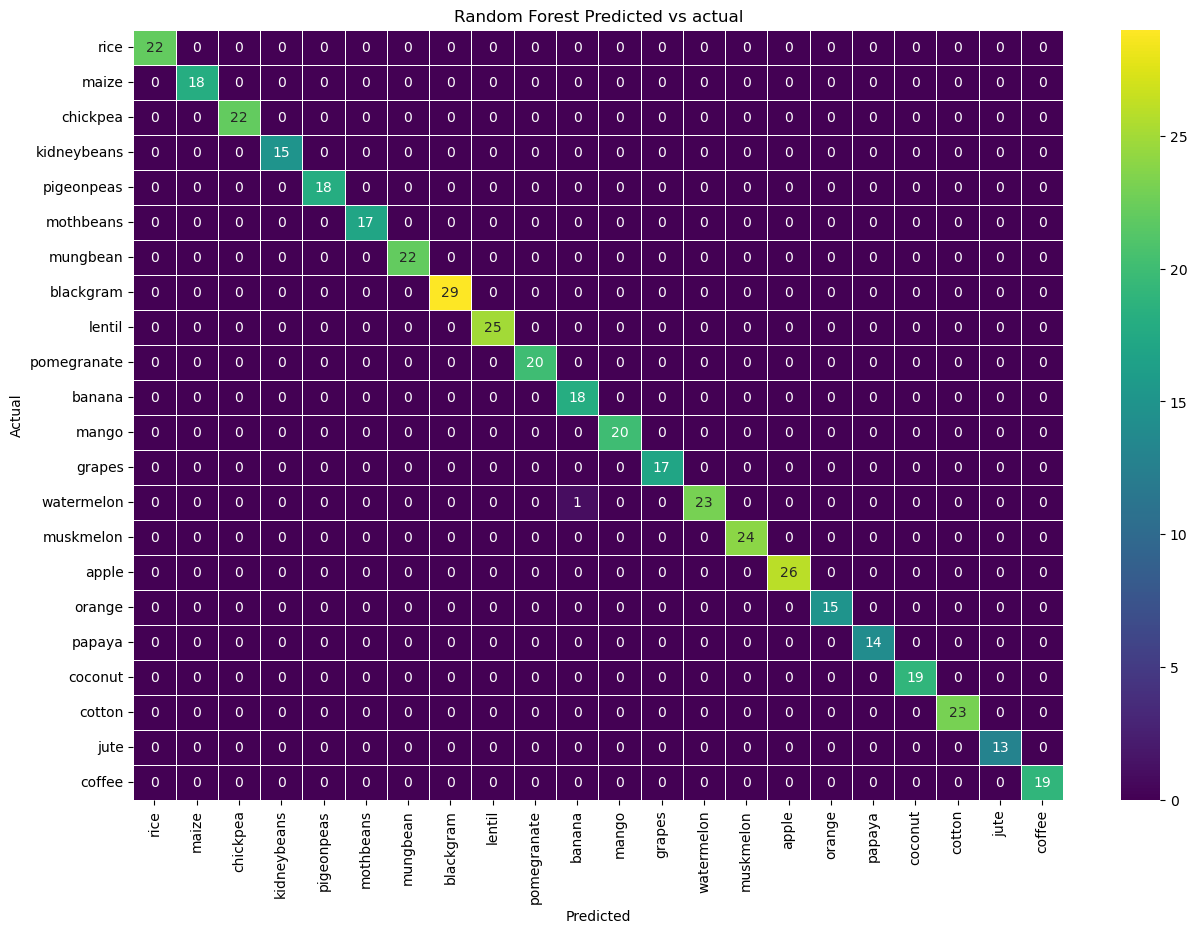

In [394]:
cm_rf = confusion_matrix(y_test, rf_predict)

cm_df = pd.DataFrame(cm_rf,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Predicted vs actual')
plt.show()

In [395]:
score = cross_val_score(rf_model,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99318182 0.99318182 0.99318182 0.98409091 0.98181818]


In [396]:
#Print Train Accuracy
rf_train_accuracy = rf_model.score(X_train,y_train)
print("Training accuracy = ",rf_model.score(X_train,y_train))
#Print Test Accuracy
rf_test_accuracy = rf_model.score(X_test,y_test)
print("Testing accuracy = ",rf_model.score(X_test,y_test))

Training accuracy =  0.9994318181818181
Testing accuracy =  0.9977272727272727


### Saving trained Random Forest model

In [398]:
#pickle is used to save the model 
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)
    
print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'


### K-Nearest Neighbors

In [400]:
knn_model = KNeighborsClassifier(n_neighbors=6)

knn_model.fit(X_train,y_train)

knn_predict = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_predict)

print("KNN Accuracy is: ", knn_acc)

print(classification_report(y_test, knn_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print("K-Nearest Neighbors Accuracy in percentage is: ", knn_acc * 100 , "%")

KNN Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
    chickpea       0.96      1.00      0.98        22
 kidneybeans       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        17
    mungbean       0.96      1.00      0.98        22
   blackgram       1.00      1.00      1.00        29
      lentil       0.93      1.00      0.96        25
 pomegranate       0.87      1.00      0.93        20
      banana       1.00      1.00      1.00        18
       mango       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        17
  watermelon       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        24
       apple       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00 

In [401]:
acc.append(knn_acc)
model_name.append('K Nearest Neighbours')

print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091]
['RF', 'K Nearest Neighbours']


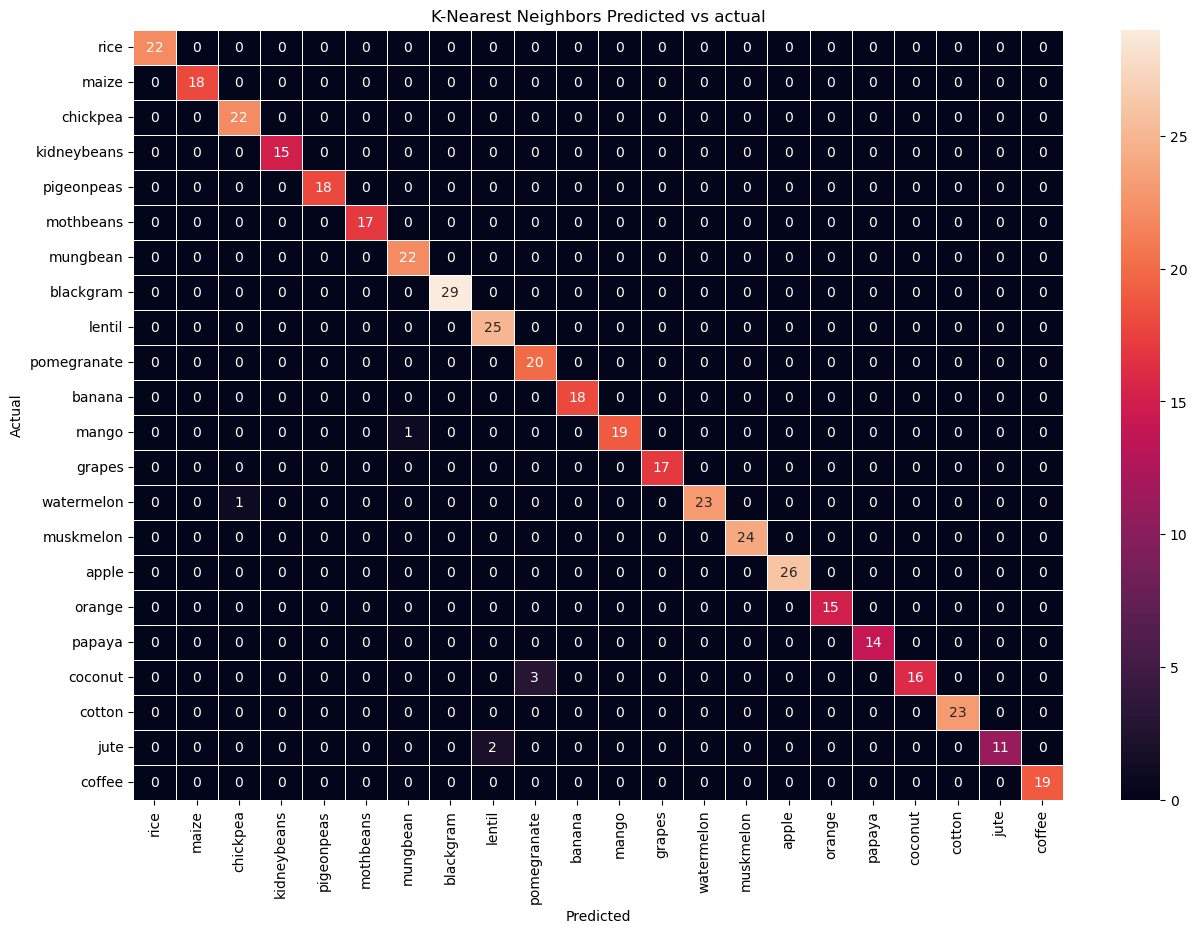

In [402]:
cm = confusion_matrix(y_test, knn_predict)

cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidth=0.5, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('K-Nearest Neighbors Predicted vs actual')
plt.show()

In [403]:
score = cross_val_score(knn_model,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.96818182 0.98181818 0.98409091 0.97045455 0.98181818]


In [404]:
#Print Train Accuracy
rf_train_accuracy = knn_model.score(X_train,y_train)
print("Training accuracy = ",knn_model.score(X_train,y_train))
#Print Test Accuracy
rf_test_accuracy = knn_model.score(X_test,y_test)
print("Testing accuracy = ",knn_model.score(X_test,y_test))

Training accuracy =  0.9857954545454546
Testing accuracy =  0.9840909090909091


### Hyperparameter Tuning

#### One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [406]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    knn_predict= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, knn_predict)

print(mean_acc)
print("The maximum accuracy is", np.max(mean_acc))

[0.96818182 0.975      0.97954545 0.97727273 0.98409091 0.98409091
 0.97954545 0.98181818 0.97954545 0.97727273 0.97727273 0.97272727
 0.97272727 0.97272727 0.975      0.975      0.97272727 0.97272727
 0.96818182 0.96818182]
The maximum accuracy is 0.9840909090909091


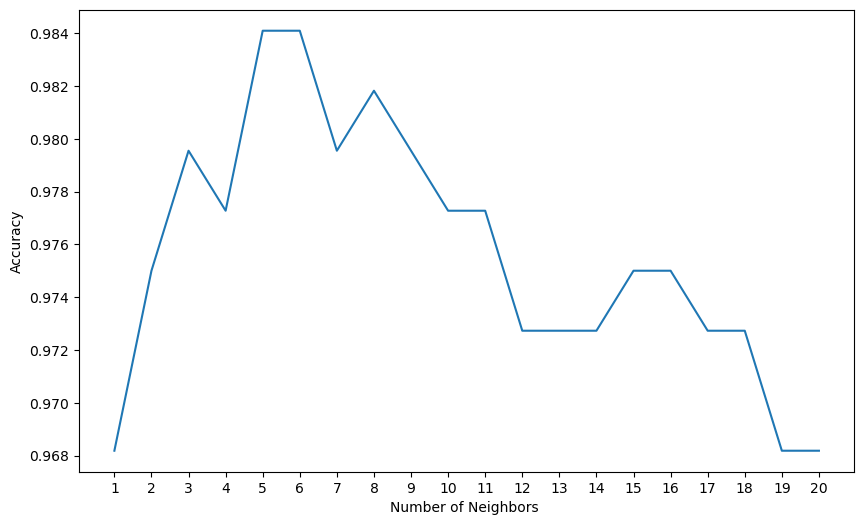

In [407]:
#Visualize the Number of K and their respective accuracy
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

#### From the above graph, it shows the k that give the best result aka accuracy is either 5 or 6

### Naive Bayes Algorithm

In [410]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_predict = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_predict)

print("Naive Bayes Accuracy is: ", nb_acc)

print(classification_report(y_test, nb_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print("Naive Bayes Accuracy in percentage is: ", nb_acc * 100 , "%")

Naive Bayes Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        18
    chickpea       1.00      1.00      1.00        22
 kidneybeans       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        29
      lentil       0.93      1.00      0.96        25
 pomegranate       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        24
       apple       1.00      1.00      1.00        26
      orange       1.00      1.00   

In [411]:
acc.append(nb_acc)
model_name.append('GaussianNB')

print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091, 0.9954545454545455]
['RF', 'K Nearest Neighbours', 'GaussianNB']


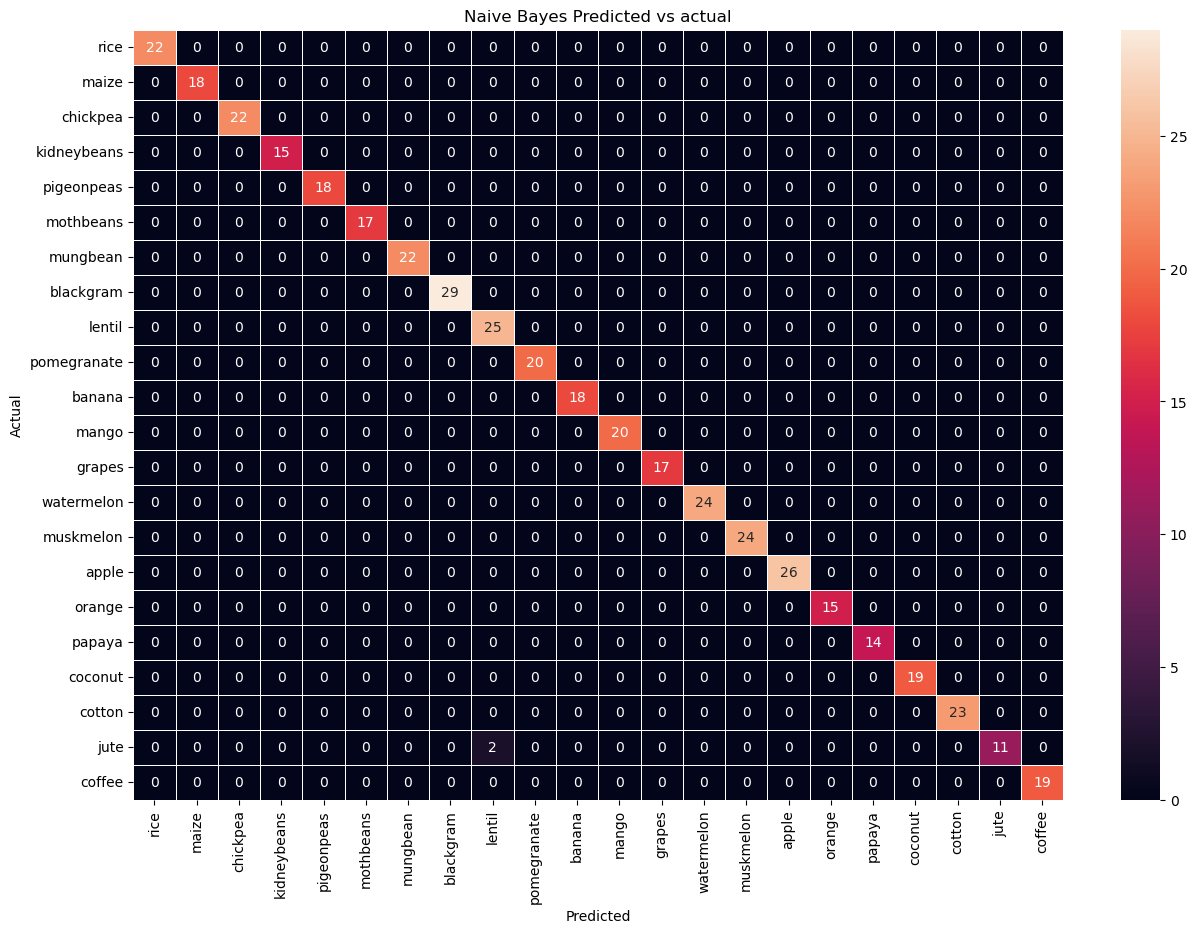

In [412]:
cm = confusion_matrix(y_test, nb_predict)

cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Naive Bayes Predicted vs actual')
plt.show()

In [413]:
score = cross_val_score(nb_model,features,target,cv=5)
print('Cross validation score for Naive Bayes: ',score)

Cross validation score for Naive Bayes:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [414]:
#Naive Bayes
#Print Train Accuracy
# nb_train_accuracy = nb_model.score(X_train,y_train)
print("Training accuracy = ", nb_model.score(X_train,y_train))
#Print Test Accuracy
# nb_test_accuracy = nb_model.score(X_test,y_test)
print("Testing accuracy = ",nb_model.score(X_test,y_test))

Training accuracy =  0.9948863636363636
Testing accuracy =  0.9954545454545455


### Gradient Boosting Algorithms

### eXtreme Gradient Boosting Algorithm

In [417]:
xb_model = XGBClassifier()

xb_model.fit(X_train,y_train)

xb_predict = xb_model.predict(X_test)

xb_acc = accuracy_score(y_test, xb_predict)

print("eXtreme Gradient Boosting Accuracy is: ", xb_acc)

print(classification_report(y_test, xb_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print(f"eXtreme Gradient Boosting Accuracy in percentage is: , {xb_acc*100:.2f}%")

eXtreme Gradient Boosting Accuracy is:  0.9977272727272727
              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        22
       maize       0.95      1.00      0.97        18
    chickpea       1.00      1.00      1.00        22
 kidneybeans       1.00      1.00      1.00        15
  pigeonpeas       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
 pomegranate       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        24
       apple       1.00      1.00      1.00        26
      orange       1.0

In [418]:
acc.append(xb_acc)
model_name.append('eXtreme Gradient Boosting')

print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091, 0.9954545454545455, 0.9977272727272727]
['RF', 'K Nearest Neighbours', 'GaussianNB', 'eXtreme Gradient Boosting']


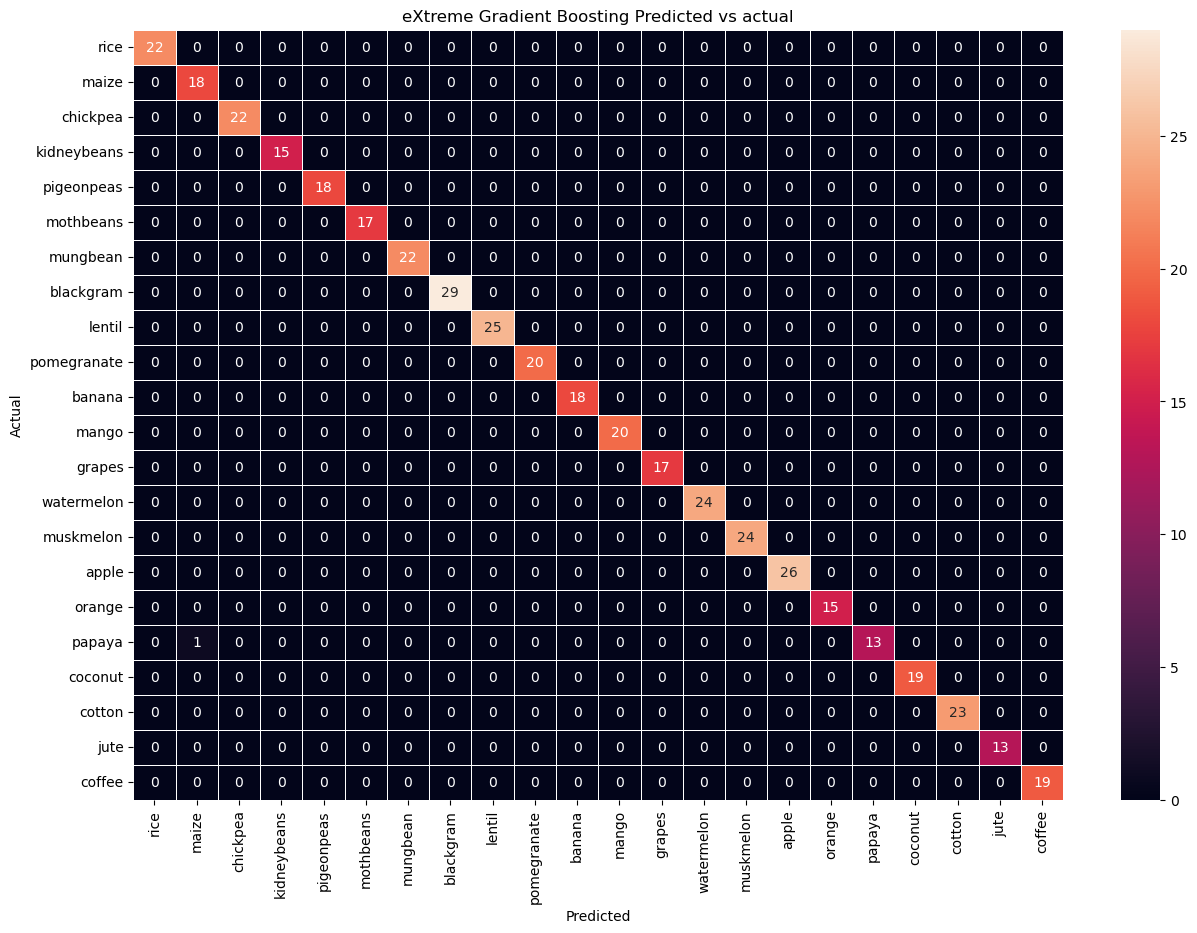

In [419]:
cm = confusion_matrix(y_test, xb_predict)

cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('eXtreme Gradient Boosting Predicted vs actual')
plt.show()

In [420]:
score = cross_val_score(xb_model,features,target,cv=5)
print('Cross validation score for Xg: ',score)

Cross validation score for Xg:  [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]


In [421]:
#Print Train Accuracy
# rf_train_accuracy = rf_model.score(X_train,y_train)
print("Training accuracy = ",xb_model.score(X_train,y_train))
#Print Test Accuracy
# rf_test_accuracy = rf_model.score(X_test,y_test)
print("Testing accuracy = ",xb_model.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9977272727272727


### Light Gradient Boosting Algorithm

In [423]:
# Try different boosting types
for boosting in ['gbdt', 'dart', 'goss']:
    model = LGBMClassifier(boosting_type=boosting, n_estimators=100)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Boosting Type: {boosting}, Accuracy: {accuracy:.2f}")

#Boosting Type: gbdt, Accuracy: 1.00
#Boosting Type: dart, Accuracy: 0.99
#Boosting Type: goss, Accuracy: 1.00

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.030418
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.210389
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.091042
[

In [424]:
lgb_model = LGBMClassifier(objective='multiclass',boosting_type= 'goss',n_jobs = 5,
          silent = True, random_state=5)

lgb_model.fit(X_train,y_train)

lgb_predict = lgb_model.predict(X_test)

lgb_acc = accuracy_score(y_test, lgb_predict)

print("Light Gradient Boosting Accuracy is: ", lgb_acc)

print(classification_report(y_test, lgb_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print(f"Light Gradient Boosting Accuracy in percentage is: , {lgb_acc*100:.2f}%")

#Light Gradient Boosting Accuracy in percentage is: , 100.00%

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.116360
[L

In [425]:
acc.append(lgb_acc)
model_name.append('Light Gradient Boosting')

print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091, 0.9954545454545455, 0.9977272727272727, 1.0]
['RF', 'K Nearest Neighbours', 'GaussianNB', 'eXtreme Gradient Boosting', 'Light Gradient Boosting']


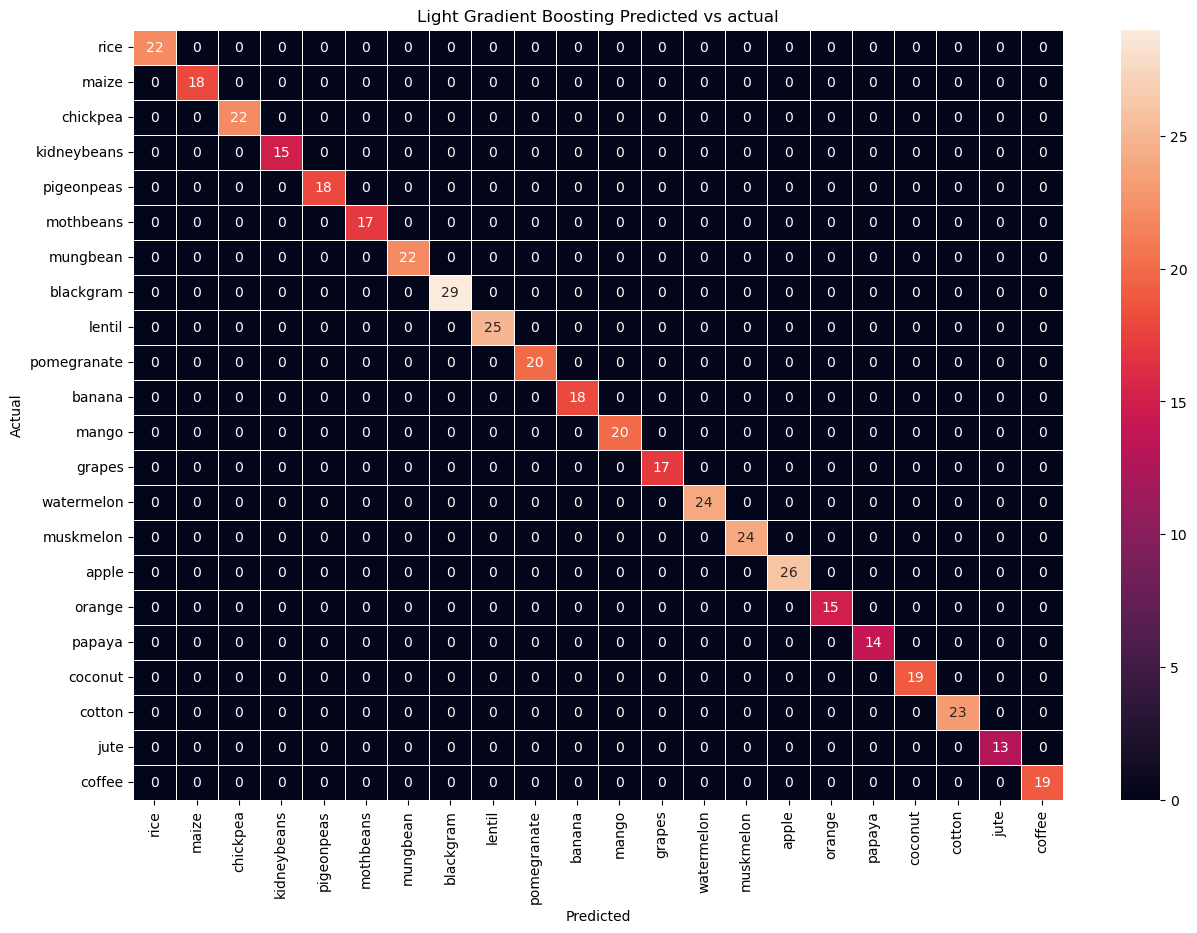

In [426]:
cm = confusion_matrix(y_test, lgb_predict)

cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Light Gradient Boosting Predicted vs actual')
plt.show()

#### Accuracy for Light Gradient Boosting Algorithm = 100%

In [428]:
score = cross_val_score(lgb_model,features,target,cv=5)
print('Cross validation score for lgb: ',score)

#Cross validation score for lgb:  [0.99545455 0.98863636 0.99318182 0.99545455 0.98863636]

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[L

In [429]:
#Print Train Accuracy
# rf_train_accuracy = rf_model.score(X_train,y_train)
print("Training accuracy = ",lgb_model.score(X_train,y_train))
#Print Test Accuracy
# rf_test_accuracy = rf_model.score(X_test,y_test)
print("Testing accuracy = ",lgb_model.score(X_test,y_test))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Training accuracy =  1.0
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Testing accuracy =  1.0


### Saving trained Light Gradient Boosting model

In [431]:
with open("light_gradient_boosting_model.pkl", "wb") as file:
    pickle.dump(lgb_model, file)
    
print("Light Gradient Boosting model saved as 'light_gradient_boosting_model.pkl'")

Light Gradient Boosting model saved as 'light_gradient_boosting_model.pkl'


### Categorical Boosting Algorithm

In [433]:
cat_model = CatBoostClassifier()

cat_model.fit(X_train,y_train)

cat_predict = cat_model.predict(X_test)

cat_acc = accuracy_score(y_test, cat_predict)


print("Categorical Boosting Accuracy is: ", cat_acc)

print(classification_report(y_test, cat_predict, target_names=  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']))

print(f"Categorical Boosting Accuracy in percentage is: {cat_acc*100:.2f}%")
#Categorical Boosting Accuracy in percentage is: 99.77%

Learning rate set to 0.081441
0:	learn: 2.4895178	total: 155ms	remaining: 2m 34s
1:	learn: 2.1364546	total: 227ms	remaining: 1m 53s
2:	learn: 1.8867992	total: 299ms	remaining: 1m 39s
3:	learn: 1.6958712	total: 371ms	remaining: 1m 32s
4:	learn: 1.5274717	total: 437ms	remaining: 1m 27s
5:	learn: 1.4055529	total: 506ms	remaining: 1m 23s
6:	learn: 1.2925405	total: 569ms	remaining: 1m 20s
7:	learn: 1.1882092	total: 636ms	remaining: 1m 18s
8:	learn: 1.0885903	total: 710ms	remaining: 1m 18s
9:	learn: 1.0040485	total: 784ms	remaining: 1m 17s
10:	learn: 0.9319219	total: 847ms	remaining: 1m 16s
11:	learn: 0.8710495	total: 910ms	remaining: 1m 14s
12:	learn: 0.8133435	total: 975ms	remaining: 1m 13s
13:	learn: 0.7589510	total: 1.03s	remaining: 1m 12s
14:	learn: 0.7069833	total: 1.09s	remaining: 1m 11s
15:	learn: 0.6631594	total: 1.16s	remaining: 1m 11s
16:	learn: 0.6251398	total: 1.23s	remaining: 1m 10s
17:	learn: 0.5898002	total: 1.29s	remaining: 1m 10s
18:	learn: 0.5559375	total: 1.35s	remaining:

In [434]:
acc.append(cat_acc)
model_name.append('Categorical Boosting')

print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091, 0.9954545454545455, 0.9977272727272727, 1.0, 0.9977272727272727]
['RF', 'K Nearest Neighbours', 'GaussianNB', 'eXtreme Gradient Boosting', 'Light Gradient Boosting', 'Categorical Boosting']


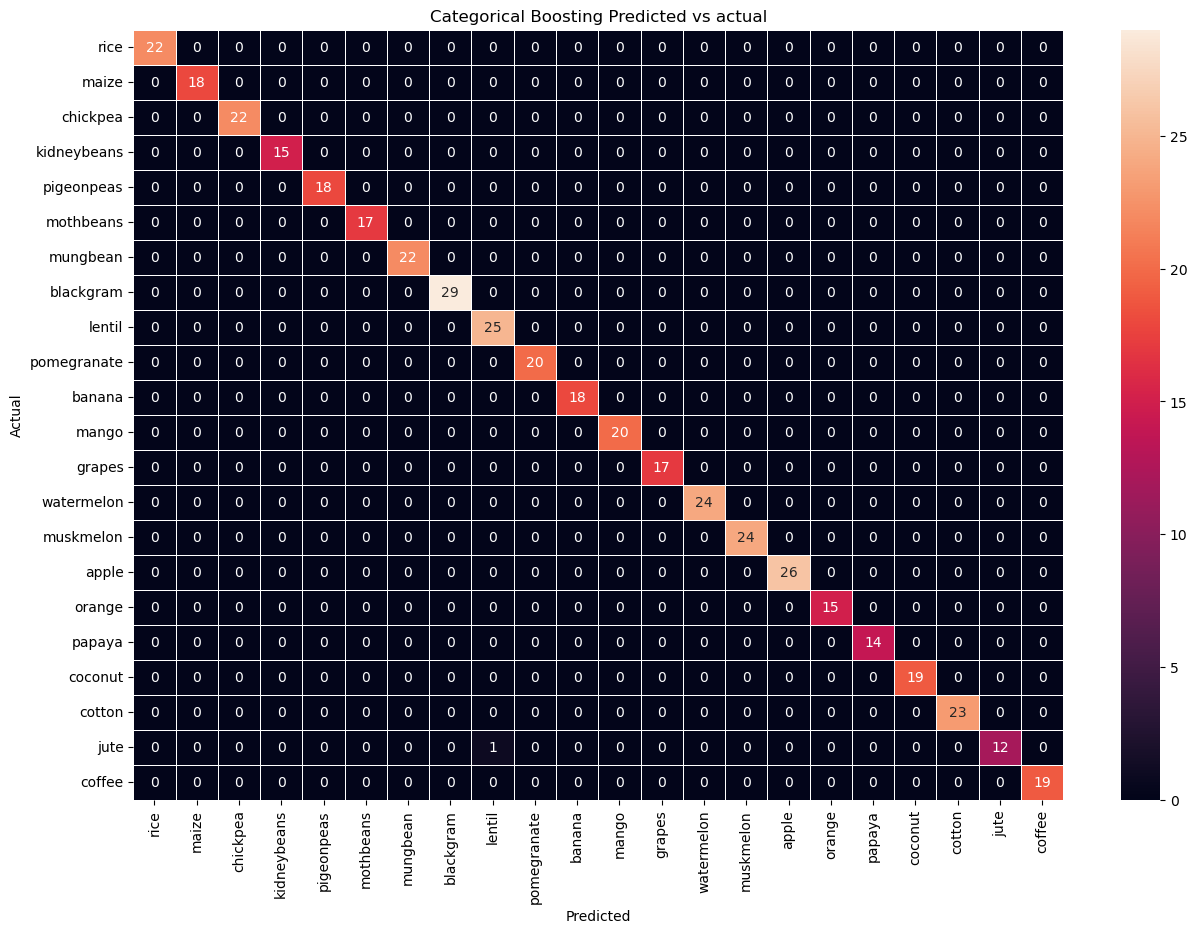

In [435]:
cm = confusion_matrix(y_test, cat_predict)

cm_df = pd.DataFrame(cm,
                     index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'],
                     columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, fmt=".0f", ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Categorical Boosting Predicted vs actual')
plt.show()

In [436]:
score = cross_val_score(lgb_model,features,target,cv=5)
print('Cross validation score for lgb: ',score)

#Cross validation score for lgb:  [0.99545455 0.98863636 0.99318182 0.99545455 0.98863636]

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[L

In [437]:
#Print Train Accuracy
# rf_train_accuracy = rf_model.score(X_train,y_train)
print("Training accuracy = ", cat_model.score(X_train,y_train))
#Print Test Accuracy
# rf_test_accuracy = rf_model.score(X_test,y_test)
print("Testing accuracy = ", cat_model.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9977272727272727


### Accuracy Comparison

In [439]:
models = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'eXtremeGradientBoosting': XGBClassifier(),
    'LightGradientBoostingClassifer': LGBMClassifier(objective='multiclass',boosting_type= 'goss',n_jobs = 5,
          silent = True, random_state=5),
    'CategoricalBoostingClassifier': CatBoostClassifier()
}

In [440]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score*100:.2f}")

GaussianNB mode with accuracy: 99.55
KNeighborsClassifier mode with accuracy: 98.41
RandomForestClassifier mode with accuracy: 99.77
eXtremeGradientBoosting mode with accuracy: 99.77
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM]

### Summary of the models used and their accuracy

In [442]:
# GaussianNB mode with accuracy: 99.55
# KNeighborsClassifier mode with accuracy: 98.41
# RandomForestClassifier mode with accuracy: 99.77
# eXtremeGradientBoosting mode with accuracy: 99.77
# LightGradientBoostingClassifer mode with accuracy: 100.00
# CategoricalBoostingClassifier mode with accuracy: 99.77

In [443]:
print(acc)
print(model_name)

[0.9977272727272727, 0.9840909090909091, 0.9954545454545455, 0.9977272727272727, 1.0, 0.9977272727272727]
['RF', 'K Nearest Neighbours', 'GaussianNB', 'eXtreme Gradient Boosting', 'Light Gradient Boosting', 'Categorical Boosting']


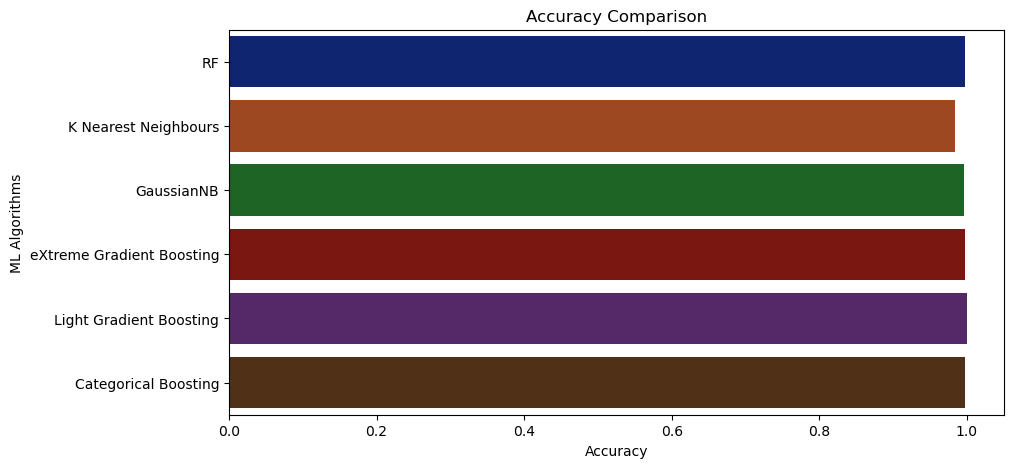

In [444]:
plt.figure(figsize=[10,5],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc, y = model_name,palette='dark')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

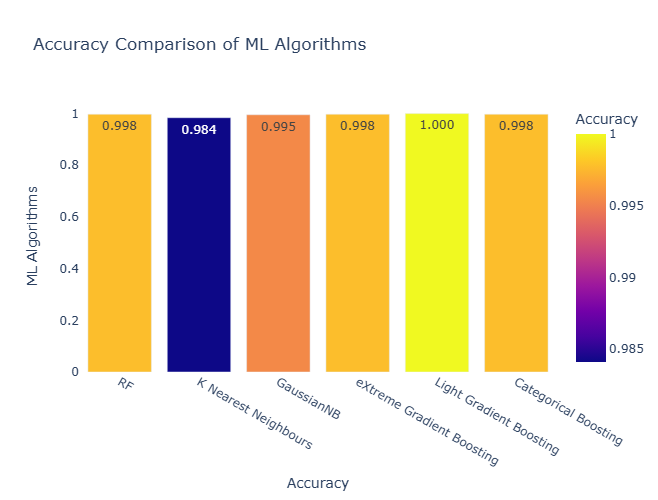

In [445]:
df = pd.DataFrame({'Accuracy': acc, 'ML Algorithms': model_name})

# Create an Interactive Bar Chart for the accuracy comparison
fig = px.bar(
    df, 
    x='ML Algorithms', 
    y='Accuracy', 
    orientation='v',  # Horizontal Bar Plot
    text='Accuracy', 
    color='Accuracy', 
    title="Accuracy Comparison of ML Algorithms"
)

# Customize Appearance
fig.update_traces(texttemplate='%{text:.3f}', textposition='inside')
fig.update_layout(
    xaxis_title="Accuracy",
    yaxis_title="ML Algorithms",
    plot_bgcolor='white',
    width=800, 
    height=500
)

# Show the plot
fig.show()


In [446]:
dataset.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'label_code'],
      dtype='object')

In [447]:
#Sample

def recommendation(Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall):
    features = np.array([[Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall]])
    # mx_features = mx.transform(features)
    prediction = lgb_model.predict(features).reshape(1,-1)
    return prediction[0]

In [448]:
dataset.head()

Nitrogen  Phosphorus  Potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  label_code  
0  202.935536  rice          20  
1  226.655537  rice          20  
2  263.964248  rice          20  
3  242.864034  rice          20  
4  262.717340  rice          20

In [449]:
N = 90
P = 42
K = 43
temperature = 20.879744
humidity = 82.002744
ph = 6.502985
rainfall = 202

recommendation(N, P, K, temperature, humidity, ph, rainfall)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


array([20])

## Done
### Heading over to create the user interface using streamlit

In [451]:
# !pip install pandoc